# Final Project: Regression Analysis - Predicting Life Expectancy Using Regression Analysis: A Data-Driven Approach

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
5 April 2025 <br>

### Introduction and Background

Life expectancy is a central metric used to assess the health and development status of populations across the globe. It reflects the average number of years a person can expect to live, assuming that current mortality rates persist. Given its sensitivity to a wide range of health, social, and economic conditions, life expectancy serves as a comprehensive indicator for public health monitoring and policy evaluation (Marmot, 2005). Accurately predicting life expectancy using relevant predictors can enable governments, health organizations, and researchers to better understand the drivers of longevity and identify intervention points to improve population health outcomes. <br>

This project utilizes the Life Expectancy (WHO) dataset, which is publicly available on Kaggle (Kumar, 2017). The dataset spans from the year 2000 to 2015 and includes 193 countries, capturing both developing and developed regions. Variables in the dataset represent a diverse set of indicators including adult mortality, alcohol consumption, hepatitis B immunization coverage, GDP, BMI, HIV/AIDS prevalence, schooling, and health expenditure. <br>

The goal of this project is to apply regression modeling techniques to predict life expectancy using various socioeconomic and health-related features. This involves exploring the structure and quality of the data, selecting relevant features, applying and comparing multiple regression models, and interpreting the results to draw actionable insights. <br>

### Analytical Framework and Methodology

#### Exploratory Data Analysis (EDA)

The first step in any data-driven investigation is an in-depth exploratory data analysis (EDA). Through visualizations such as histograms, scatterplots, boxplots, and heatmaps, patterns and distributions can be observed, while anomalies, missing values, and potential outliers can be identified. EDA serves to inform subsequent modeling decisions and aids in understanding the relationships between predictors and the target variable. <br>

According to Tukey (1977), exploratory data analysis plays a critical role in revealing structure in data that may not be apparent through formal statistical modeling. It promotes the generation of insights and hypotheses by relying on graphical techniques and descriptive summaries. <br>

#### Data Preparation and Preprocessing

Data preprocessing includes: <br>

- Handling missing values using statistical imputation or row-wise deletion where necessary.

- Encoding categorical variables, such as country development status, into numerical formats using label or one-hot encoding.

- Outlier detection and treatment based on inter-quartile ranges or z-scores.

- Feature scaling, particularly through standardization, to ensure that features contribute equally during model training.

These preprocessing techniques are essential to minimize bias and variance in the resulting models, thereby enhancing their predictive performance and interpretability (Han, Pei, & Kamber, 2011). <br>

#### Feature Selection and Engineering

Feature selection involves identifying the most influential variables to include in the model. This step can be guided by domain knowledge, correlation analysis, or automated methods such as recursive feature elimination (RFE). In the context of life expectancy, prior research suggests that variables such as income level, education, health spending, and disease prevalence are strong predictors (Preston, Heuveline, & Guillot, 2001). Feature engineering may involve creating new variables by combining existing ones (e.g., healthcare expenditure per capita) or transforming variables to better capture non-linear relationships. <br>

#### Regression Modeling Techniques

The primary modeling technique used in this project is linear regression, which serves as a baseline model. Linear regression is widely used for its simplicity and interpretability and is suitable for quantifying linear relationships between the target variable and the predictors. <br>

To improve accuracy and accommodate non-linear relationships, polynomial regression will also be implemented. This allows the model to capture curvature in the data that linear models may fail to represent. <br>

Further, pipelines will be created to streamline the modeling process, combining preprocessing steps with model training in a reproducible workflow. Pipelines reduce data leakage and improve consistency in cross-validation and testing (Pedregosa et al., 2011). <br>

Model performance will be evaluated using metrics such as: <br>

- R^2 (coefficient of determination) to measure the proportion of variance explained,

- MAE (mean absolute error) to assess average prediction error,

- RMSE (root mean squared error) to penalize large errors more heavily.

These metrics will be compared across models to determine which configuration yields the most accurate and generalizable predictions. <br>

#### Expected Outcomes and Significance

By the end of this analysis, the most influential factors affecting life expectancy across countries will be identified. This will not only offer insight into global health trends but also provide evidence-based recommendations for policy interventions. The results may support the allocation of resources to areas such as education, disease prevention, and economic development—all shown to impact longevity in prior research (Cutler, Deaton, & Lleras-Muney, 2006). <br>

This project also serves as a practical demonstration of applying machine learning techniques within the public health domain. The modeling strategies, visualization techniques, and interpretive frameworks developed herein can be extended to other datasets and problem domains involving continuous outcomes. <br>

### Section 1. Import and Inspect the Data

Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>

IPython.core.display is a module from the IPython library that provides tools for displaying rich output in Jupyter Notebooks, including formatted text, images, HTML, and interactive widgets. It enhances visualization and interaction within Jupyter environments.
https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.display.html <br>



In [292]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score, classification_report, silhouette_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV, RFE, SelectKBest, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Fully disable output truncation in Jupyter (for VS Code)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

#### 1.1. Load the Dataset and Display the First 10 Rows.

In this step, I begin by loading the Life Expectancy dataset into a pandas DataFrame. I then display the first 10 rows to get a quick overview of the data structure, feature names, and the types of values included in the dataset. <br> 

In [236]:
# Define the file path to the dataset
file_path = r'C:\Projects\ml_regression_data-git-hub\data\life_expectancy_data.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Display the first 10 rows of the dataset
df.head(10)

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   
5  Afghanistan  2010  Developing             58.8            279.0   
6  Afghanistan  2009  Developing             58.6            281.0   
7  Afghanistan  2008  Developing             58.1            287.0   
8  Afghanistan  2007  Developing             57.5            295.0   
9  Afghanistan  2006  Developing             57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   
5             74     0.01               79.679367         66.0     1989  ...   
6             77     0.01               56.762217         63.0     2861  ...   
7             80     0.03               25.873925         64.0     1599  ...   
8             82     0.02               10.910156         63.0     1141  ...   
9             84     0.03               17.171518         64.0     1990  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   
5   66.0               9.20        66.0       0.1  553.328940   2883167.0   
6   63.0               9.42        63.0       0.1  445.893298    284331.0   
7   64.0               8.33        64.0       0.1  373.361116   2729431.0   
8   63.0               6.73        63.0       0.1  369.835796  26616792.0   
9   58.0               7.43        58.0       0.1  272.563770   2589345.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   
5                  18.4                18.4                            0.448   
6                  18.6                18.7                            0.434   
7                  18.8                18.9                            0.433   
8                  19.0                19.1                            0.415   
9                  19.2                19.3                            0.405   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  
5        9.2  
6        8.9  
7        8.7  
8        8.4  
9        8.1  

[10 rows x 22 columns]

#### 1.2. Check for Missing Values and Display Summary Statistics.

##### 1.2.1. Missing Values and Percentage

In this step, I check for missing values in the dataset to identify any columns with incomplete data that may require cleaning or imputation. I also display summary statistics to understand the central tendency, spread, and distribution of numerical features. This helps guide decisions on data preprocessing and modeling strategies. <br>

In [237]:
# Calculate missing values in total and as percentage
missing_data = df.isnull().sum().to_frame(name='Missing Count')
missing_data['Missing Percentage'] = (missing_data['Missing Count'] / len(df)) * 100

# Display columns with missing values only
missing_data[missing_data['Missing Count'] > 0]

Missing Count  Missing Percentage
Life expectancy                             10            0.340368
Adult Mortality                             10            0.340368
Alcohol                                    194            6.603131
Hepatitis B                                553           18.822328
BMI                                         34            1.157250
Polio                                       19            0.646698
Total expenditure                          226            7.692308
Diphtheria                                  19            0.646698
GDP                                        448           15.248468
Population                                 652           22.191967
thinness  1-19 years                        34            1.157250
thinness 5-9 years                          34            1.157250
Income composition of resources            167            5.684139
Schooling                                  163            5.547992

##### 1.2.2. Display Summary Statistics

In [238]:
# Display summary statistics for numerical columns
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

### Reflection 1: What do you notice about the dataset? Are there any data issues?

Upon reviewing the summary statistics and missing value analysis of the Life Expectancy dataset, several important observations emerge. First, the dataset spans a substantial time period from 2000 to 2015 and includes a broad set of features covering public health, demographic, and economic indicators. Most variables are numerical and display reasonable ranges, though some have wide standard deviations indicating high variability across countries and years. <br>

In terms of data completeness, there are several columns with missing values. For instance, Population has the highest proportion of missing data at approximately 22.2%, followed by Hepatitis B (18.8%) and GDP (15.2%). Additional variables such as Total expenditure, Alcohol, and Income composition of resources also contain notable gaps. These missing values will need to be addressed either through imputation or removal depending on their impact on modeling. Fortunately, the target variable, Life expectancy, has a relatively low missing percentage (0.34%), which should not severely impact the regression analysis. <br>

Additionally, a few variables such as Measles and under-five deaths display extreme maximum values, which may indicate the presence of outliers. The percentage expenditure variable also has a very high maximum value (over 19,000), suggesting potential data entry anomalies or extreme variation that warrants further investigation. These issues should be explored in detail during the data cleaning and preparation phase. <br>

Overall, while the dataset is rich and well-structured for regression modeling, some preprocessing steps including missing value imputation, outlier handling, and potential normalization or transformation will be necessary to ensure robust and interpretable model performance. <br>

---

### Section 2. Data Exploration and Preparation

This section focuses on conducting a thorough exploration and preparation of the data to ensure its suitability for regression analysis. The initial step involves examining the distribution, spread, and central tendencies of each variable using summary statistics and visual tools such as histograms, box plots, and correlation heatmaps. These methods help identify skewed variables, outliers, and possible multicollinearity among predictors, which are important considerations for model selection and accuracy. <br>

Effective exploratory data analysis (EDA) enables researchers to uncover hidden patterns, detect anomalies, and assess data quality before the application of statistical modeling techniques. As noted by Runkler (2012), data quality assessments during EDA significantly improve the performance and interpretability of predictive models. Furthermore, Wardhani, Rahayu, and Wibowo (2019) emphasized that early identification and treatment of noisy or inconsistent data during preprocessing can prevent downstream bias and enhance model robustness. <br>

This stage also includes the detection and handling of missing data. Columns with substantial missing values must be carefully evaluated for imputation or exclusion based on their importance to the predictive task. Feature scaling and transformation are also considered where necessary to ensure that variables are on comparable scales, particularly for algorithms sensitive to variable magnitude. Categorical features, such as development status, may be encoded numerically to ensure compatibility with regression models. <br>

These data exploration and preparation steps form the foundation for the subsequent modeling phase and contribute to the reliability, validity, and generalizability of the final model outputs. <br>

#### 2.1. Explore Data Patterns and Distribution

##### 2.1.1. Create Histograms, Box Plots, and Count Plots for Categorical Variables

In this step, visualizations are created to explore the distribution and variability of features in the dataset. Histograms are used to examine the frequency distribution and shape of continuous variables, while box plots highlight the presence of outliers and the spread of data. Count plots are applied to categorical variables to observe class distributions. Grouping plots by variable type and domain improves readability and allows for a more focused analysis of patterns relevant to regression modeling. <br>

This visual exploration supports the detection of data quality issues, abnormal ranges, and skewed distributions that may affect model performance. As stated by Zhang et al. (2020), early visualization of data structure contributes to more accurate model design and facilitates decisions regarding transformation, normalization, and outlier treatment. <br>

##### 2.1.1.1. Grouped Histogram

In this step, grouped histograms are created to visualize the distribution of continuous numerical variables in the dataset. Histograms allow for the identification of skewness, modality, and potential data irregularities such as gaps or extreme clustering. Understanding the shape of each variable’s distribution is essential for determining whether transformations, such as normalization or log-scaling, are needed prior to modeling. Displaying all histograms in a grid layout supports efficient visual comparison and highlights patterns across multiple features simultaneously. <br>

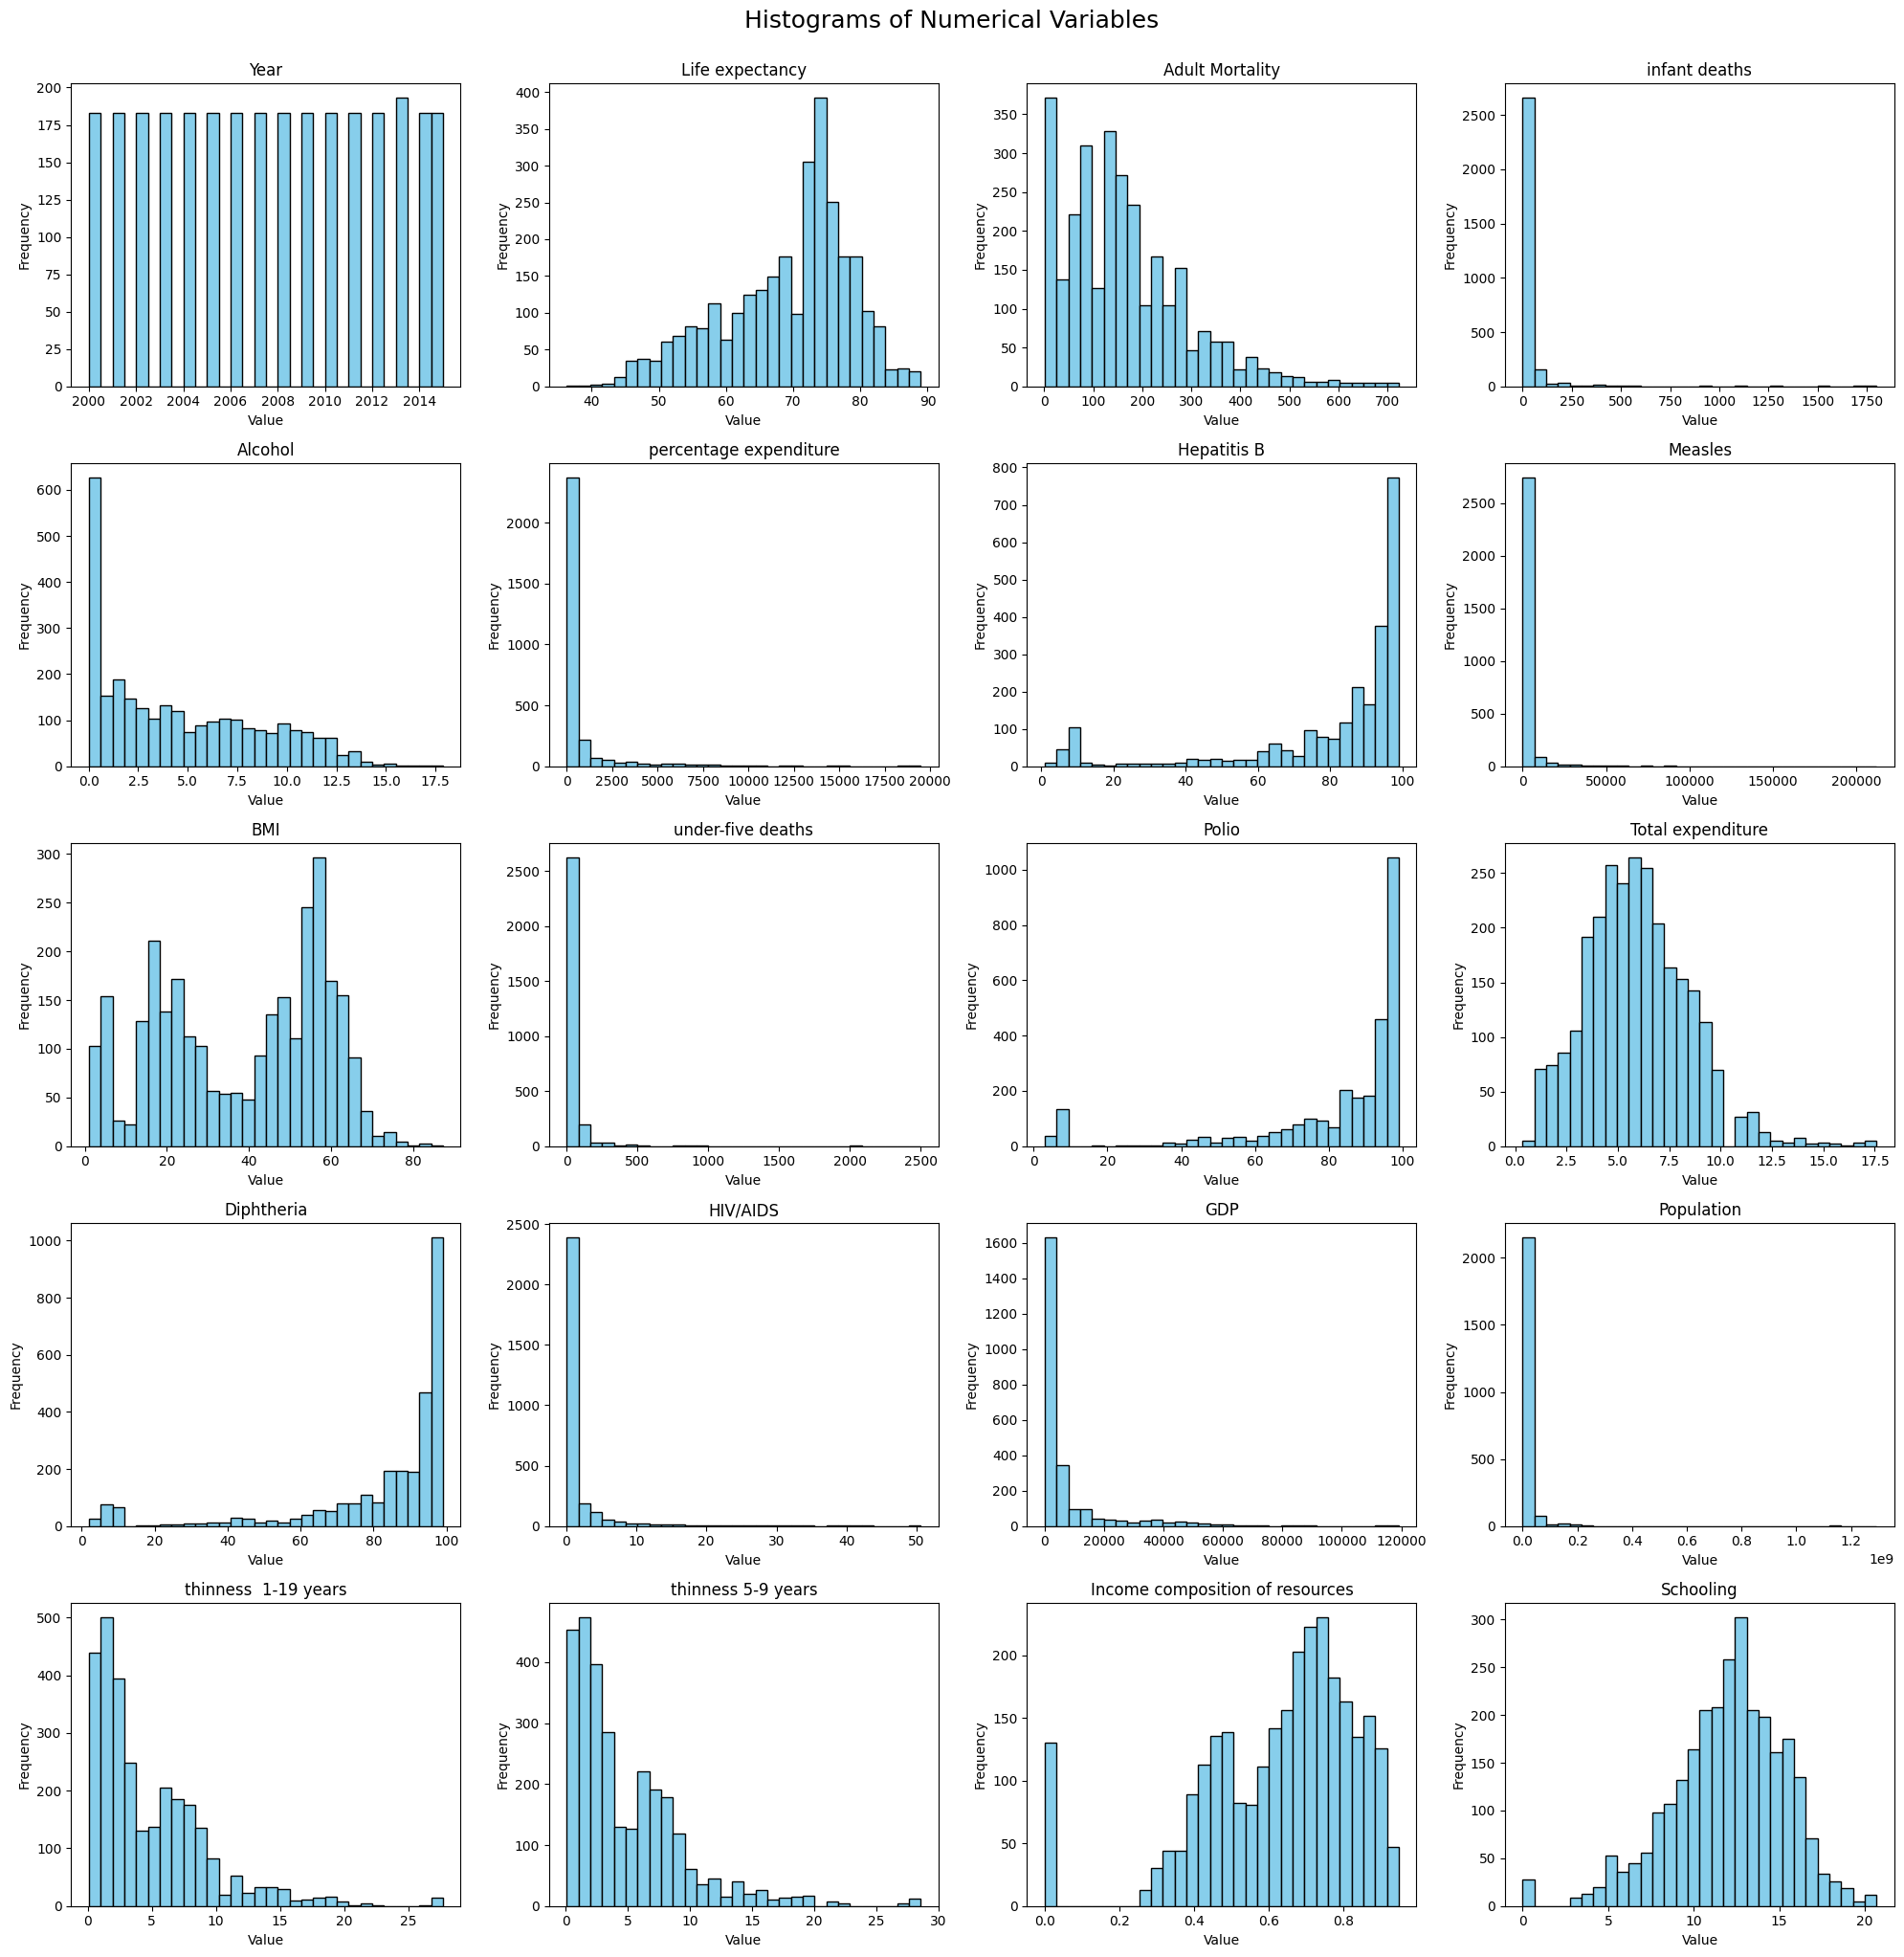

In [239]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up a grid layout for histograms
num_cols = len(numerical_cols)
cols = 4  # number of histograms per row
rows = (num_cols + cols - 1) // cols  # calculate number of rows needed

plt.figure(figsize=(20, 4 * rows))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms of Numerical Variables', fontsize=18, y=1.02)
plt.show()

##### 2.1.1.2. Grouped Box Plot

In this step, a series of grouped box plots is used to visualize the spread and variability of continuous numerical variables in the dataset. Box plots display the median, inter-quartile range (IQR), and potential outliers, offering a concise summary of each variable's distribution. This visual examination helps detect extreme values and skewness, which can negatively impact regression models if not addressed. By organizing the box plots in a grid layout, comparisons across multiple features are made more efficient, supporting informed decisions about outlier treatment and transformation prior to model development. <br>

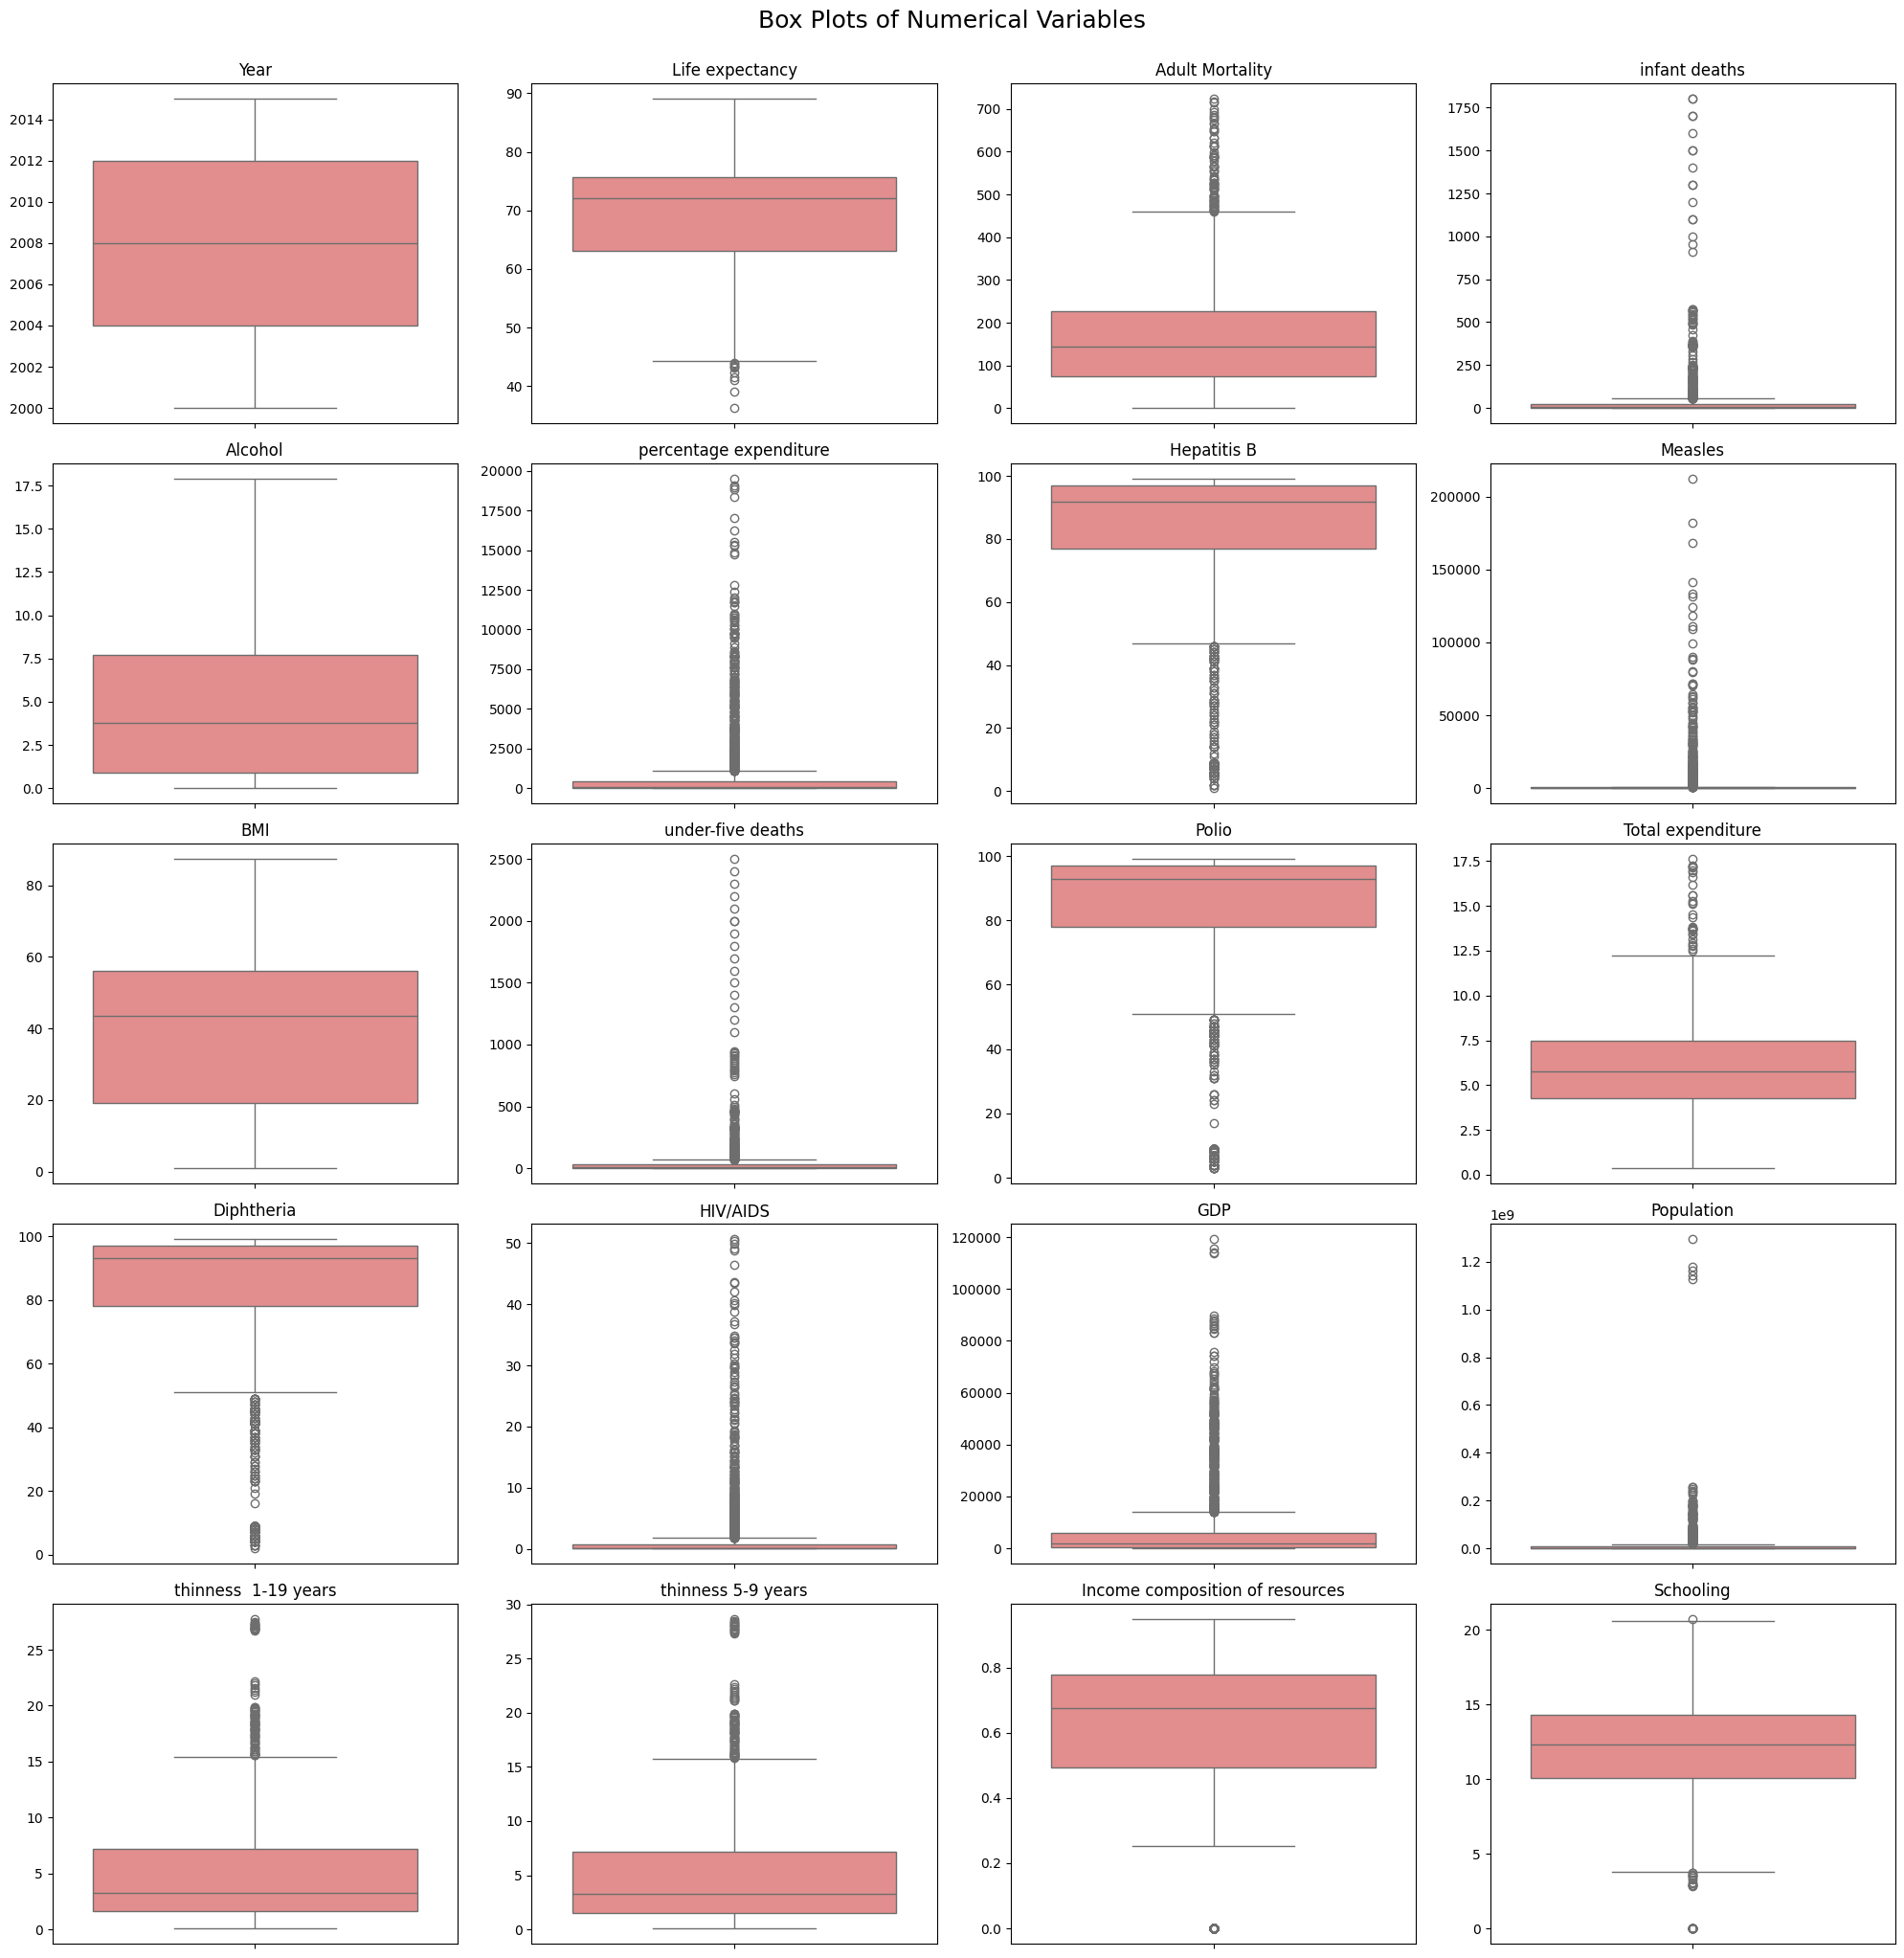

In [240]:
# Reuse numerical column selection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up a grid layout for box plots
num_cols = len(numerical_cols)
cols = 4  # number of box plots per row
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(20, 4 * rows))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Box Plots of Numerical Variables', fontsize=18, y=1.02)
plt.show()


##### 2.1.1.3. Development Status Count Plot

This plot shows the number of records classified by development status Developed vs. Developing. It helps assess class balance in this categorical feature, which may influence stratified sampling or model fairness in later stages. <br>

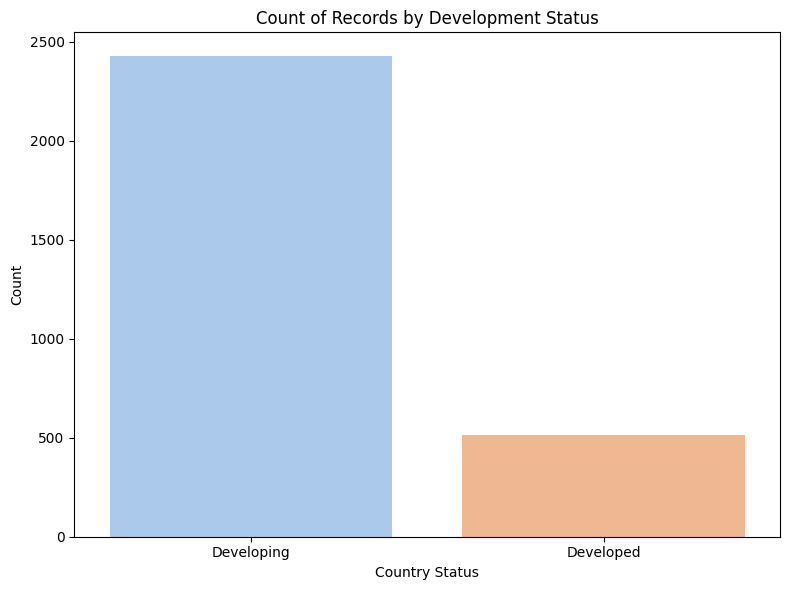

In [241]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Status', hue='Status', palette='pastel', legend=False)
plt.title('Count of Records by Development Status')
plt.xlabel('Country Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### 2.1.1.4. GDP Level Count Plot

Here, GDP is binned into three quantile-based categories: Low, Medium, and High. This plot reveals how records are distributed across economic tiers, which could inform feature transformation or stratification strategies. <br>

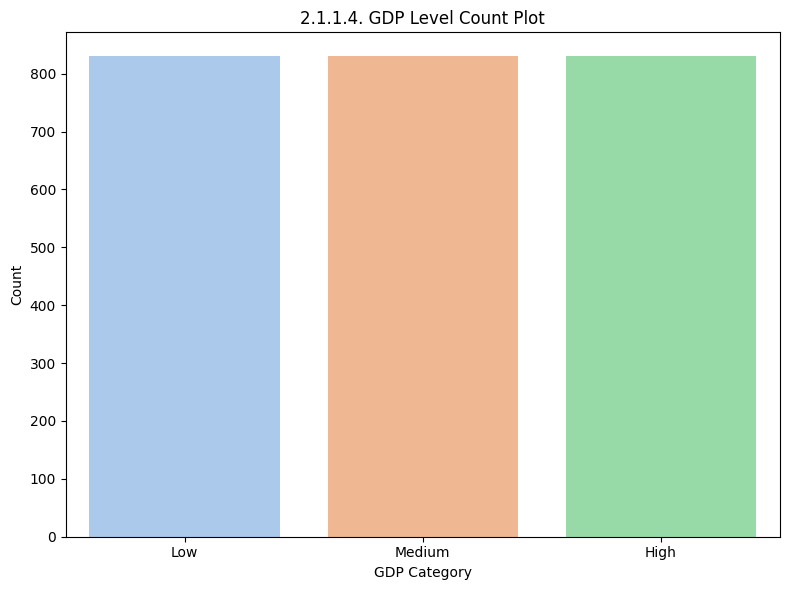

In [242]:
df_gdp_binned = df.dropna(subset=['GDP']).copy()

# Create GDP_Level by binning GDP into 3 quantile-based categories
df_gdp_binned['GDP_Level'] = pd.qcut(df_gdp_binned['GDP'], q=3, labels=['Low', 'Medium', 'High'])

# Plot count of GDP_Level
plt.figure(figsize=(8, 6))
sns.countplot(data=df_gdp_binned, x='GDP_Level', hue='GDP_Level', palette='pastel', legend=False)
plt.title('2.1.1.4. GDP Level Count Plot')
plt.xlabel('GDP Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 2.1.1.5. Year Group Count Plot

This plot groups the dataset into three time periods: 2000–2005, 2006–2010, and 2011–2015. It helps visualize how the dataset is distributed over time, which is useful when assessing temporal consistency or modeling time-aware effects.  <br>

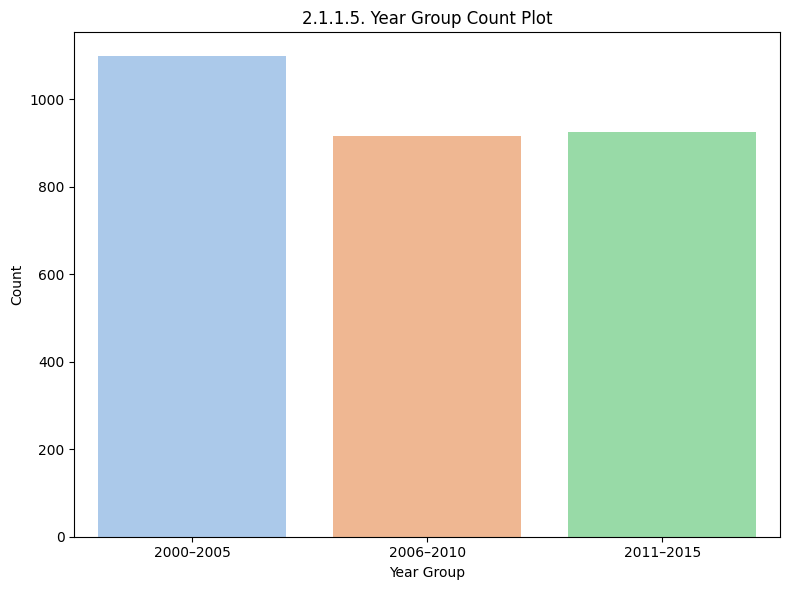

In [243]:
# Create Year_Group column by binning the 'Year' column
df['Year_Group'] = pd.cut(df['Year'], bins=[1999, 2005, 2010, 2015], labels=['2000–2005', '2006–2010', '2011–2015'])

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year_Group', hue='Year_Group', palette='pastel', legend=False)
plt.title('2.1.1.5. Year Group Count Plot')
plt.xlabel('Year Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 2.1.2. Identify Patterns, Outliers, and Anomalies in Feature Distributions

In this step, the goal is to identify meaningful patterns, outliers, and anomalies within the feature distributions. This helps assess the quality and reliability of the data and guides necessary transformations before modeling. Patterns such as linear or non-linear trends, skewed distributions, or clustering can influence feature selection, while outliers may distort model training if not addressed. <br>

##### 2.1.2.1. Identify Patterns in Feature Distributions

To identify patterns in the feature distributions, I will use pairwise plots and a correlation heatmap. These tools help reveal relationships between variables and show which features may have strong linear or non-linear associations with life expectancy or with each other. This step is essential for evaluating multicollinearity, guiding feature selection, and highlighting predictors with the strongest influence on the target variable. <br>

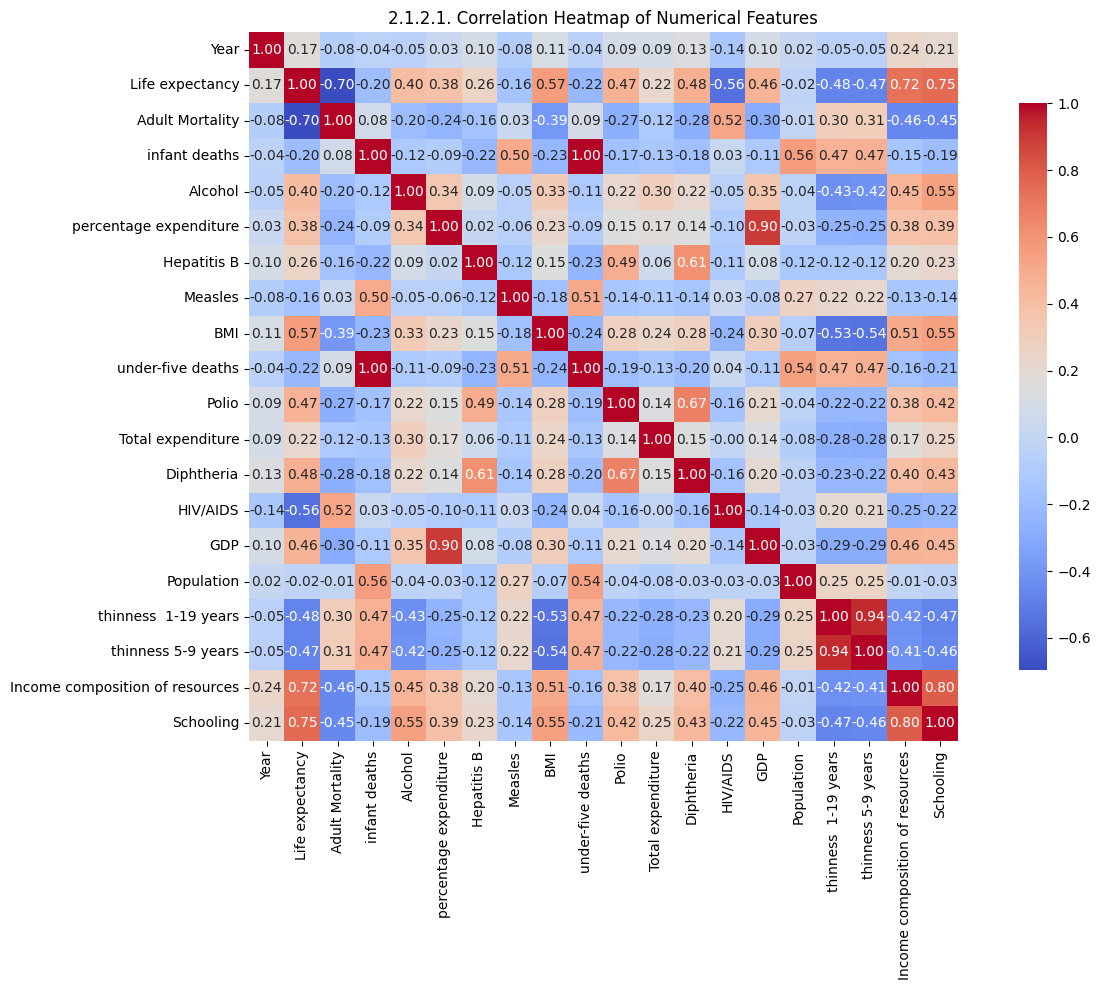

In [244]:
# Compute the correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Plot a heatmap of the correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title('2.1.2.1. Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 2.1.2.1.A. Identify Patterns in Feature Distribution Pair Plots
Subset of key variables: Life Expectancy, Adult Mortality, Schooling, Income Composition of Resources, BMI, GDP. <br>

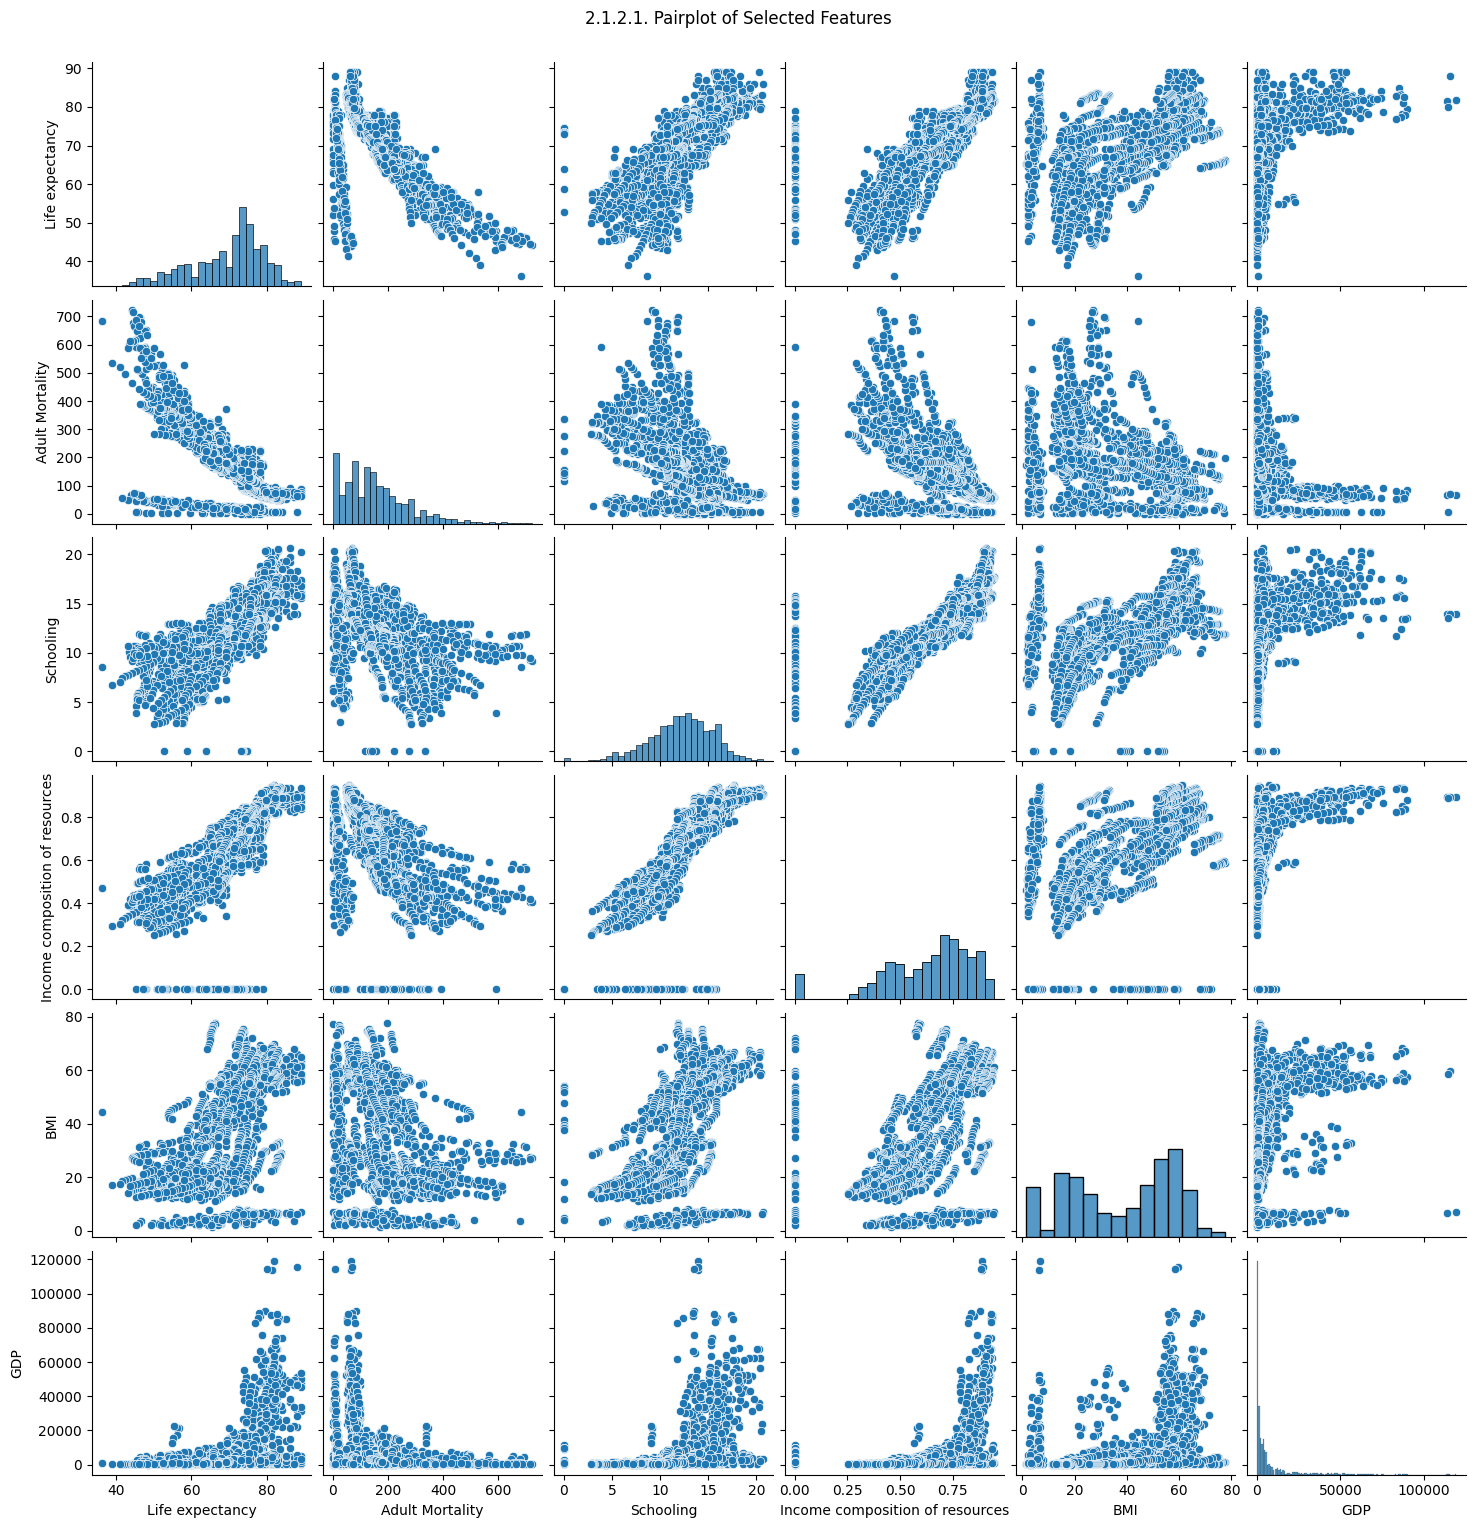

In [245]:
# Sample features for pairplot
selected_features = ['Life expectancy', 'Adult Mortality', 'Schooling', 
                     'Income composition of resources', 'BMI', 'GDP']

# Drop rows with any missing values in selected features
sns.pairplot(df[selected_features].dropna())
plt.suptitle('2.1.2.1. Pairplot of Selected Features', y=1.02)
plt.show()

##### 2.1.2.2. Identify Outliers in Feature Distributions

In this step, the objective is to detect outliers—extreme values that deviate significantly from the majority of the data. Outliers can distort statistical summaries and negatively impact regression models by inflating error metrics or introducing bias. To identify them, I will use the inter-quartile range (IQR) method to compute boundaries for what is considered a normal value in each numerical column. Observations that fall below the lower bound or above the upper bound are flagged as outliers. <br>

Outlier detection is essential for informed preprocessing decisions. Depending on the context, these values may be corrected, transformed, or removed to ensure that the model is robust and not overly sensitive to irregular data. <br>

In [246]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier info
outlier_summary = {}

# Loop through each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# Convert to DataFrame for display
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='Outlier Count', ascending=False)

# Display the top variables with the most outliers
outlier_df.head(10)

Q1            Q3   Lower Bound  \
HIV/AIDS                     0.100000  8.000000e-01 -9.500000e-01   
Measles                      0.000000  3.602500e+02 -5.403750e+02   
under-five deaths            0.000000  2.800000e+01 -4.200000e+01   
percentage expenditure       4.685343  4.415341e+02 -6.505879e+02   
GDP                        463.935626  5.910806e+03 -7.706370e+03   
infant deaths                0.000000  2.200000e+01 -3.300000e+01   
Diphtheria                  78.000000  9.700000e+01  4.950000e+01   
Population              195793.250000  7.420359e+06 -1.064106e+07   
Polio                       78.000000  9.700000e+01  4.950000e+01   
Hepatitis B                 77.000000  9.700000e+01  4.700000e+01   

                         Upper Bound  Outlier Count  
HIV/AIDS                1.850000e+00          542.0  
Measles                 9.006250e+02          542.0  
under-five deaths       7.000000e+01          394.0  
percentage expenditure  1.096807e+03          389.0  
GDP                     1.408111e+04          365.0  
infant deaths           5.500000e+01          315.0  
Diphtheria              1.255000e+02          298.0  
Population              1.825721e+07          294.0  
Polio                   1.255000e+02          279.0  
Hepatitis B             1.270000e+02          254.0

##### 2.1.2.2.A. Visualizing Feature Distributions with Violin Plots

To gain deeper insight into the distribution of variables with high outlier counts, I will generate violin plots. Unlike box plots, which summarize the data using medians and quartiles, violin plots combine this summary with a kernel density estimate that shows the full probability distribution of the data. This dual representation makes violin plots particularly effective for identifying multimodal distributions, skewness, and clusters in the data that may not be visible in standard box plots. <br>

Visualizing features in this way provides richer context for deciding how to handle outliers and transformations. For example, features with heavy right skew may benefit from log transformations, while multimodal distributions may require segmentation or deeper investigation. <br>

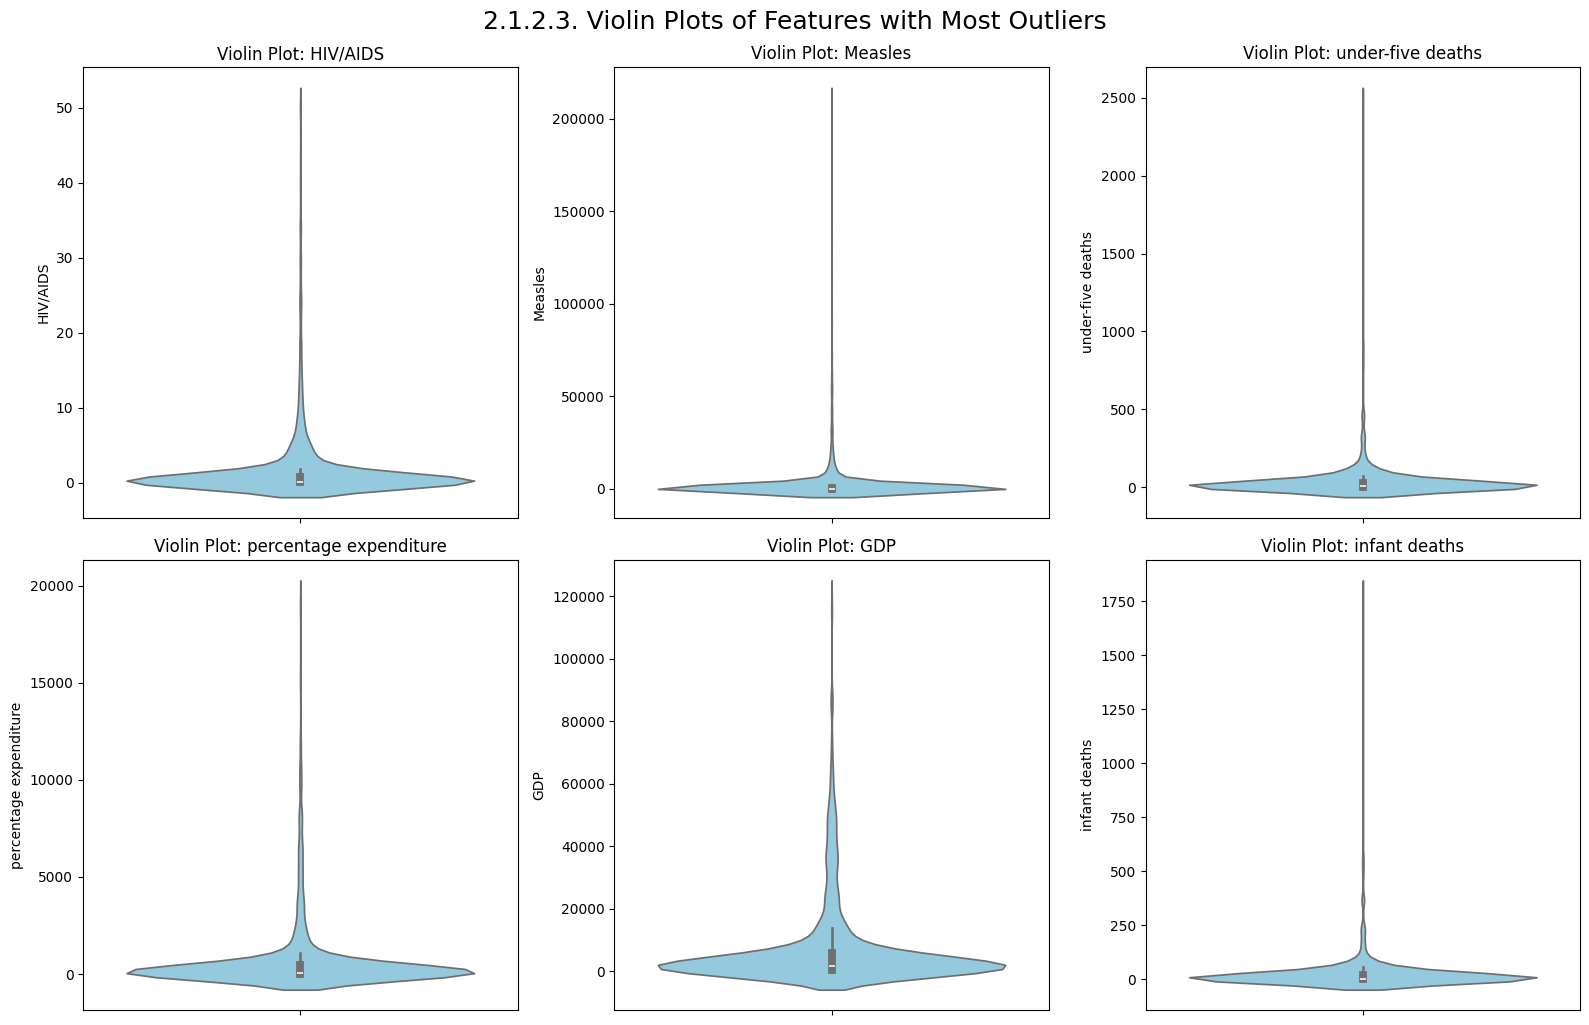

In [247]:
# Set up a grid layout for violin plots
plt.figure(figsize=(16, 10))
for i, feature in enumerate(top_outlier_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df[feature], color='skyblue', inner='box')
    plt.title(f'Violin Plot: {feature}')
    plt.tight_layout()

plt.suptitle('2.1.2.3. Violin Plots of Features with Most Outliers', fontsize=18, y=1.02)
plt.show()

##### 2.1.2.3. Identify Anomalies in Feature Distributions

In this step, the goal is to identify anomalies—unusual patterns or values that deviate significantly from the overall distribution and may not align with typical data characteristics. Anomalies can arise due to data entry errors, inconsistencies across sources, or rare real-world events. Unlike typical outliers, anomalies often stand out due to their unexpected relationships between multiple variables or extreme deviations across time or categories. <br>

To identify anomalies, I will visualize potential relationships between variables using scatter plots and overlay simple trend lines to assess linearity and deviations. This visual method helps uncover observations that violate general trends, suggesting potential errors or structural irregularities in the data. <br>

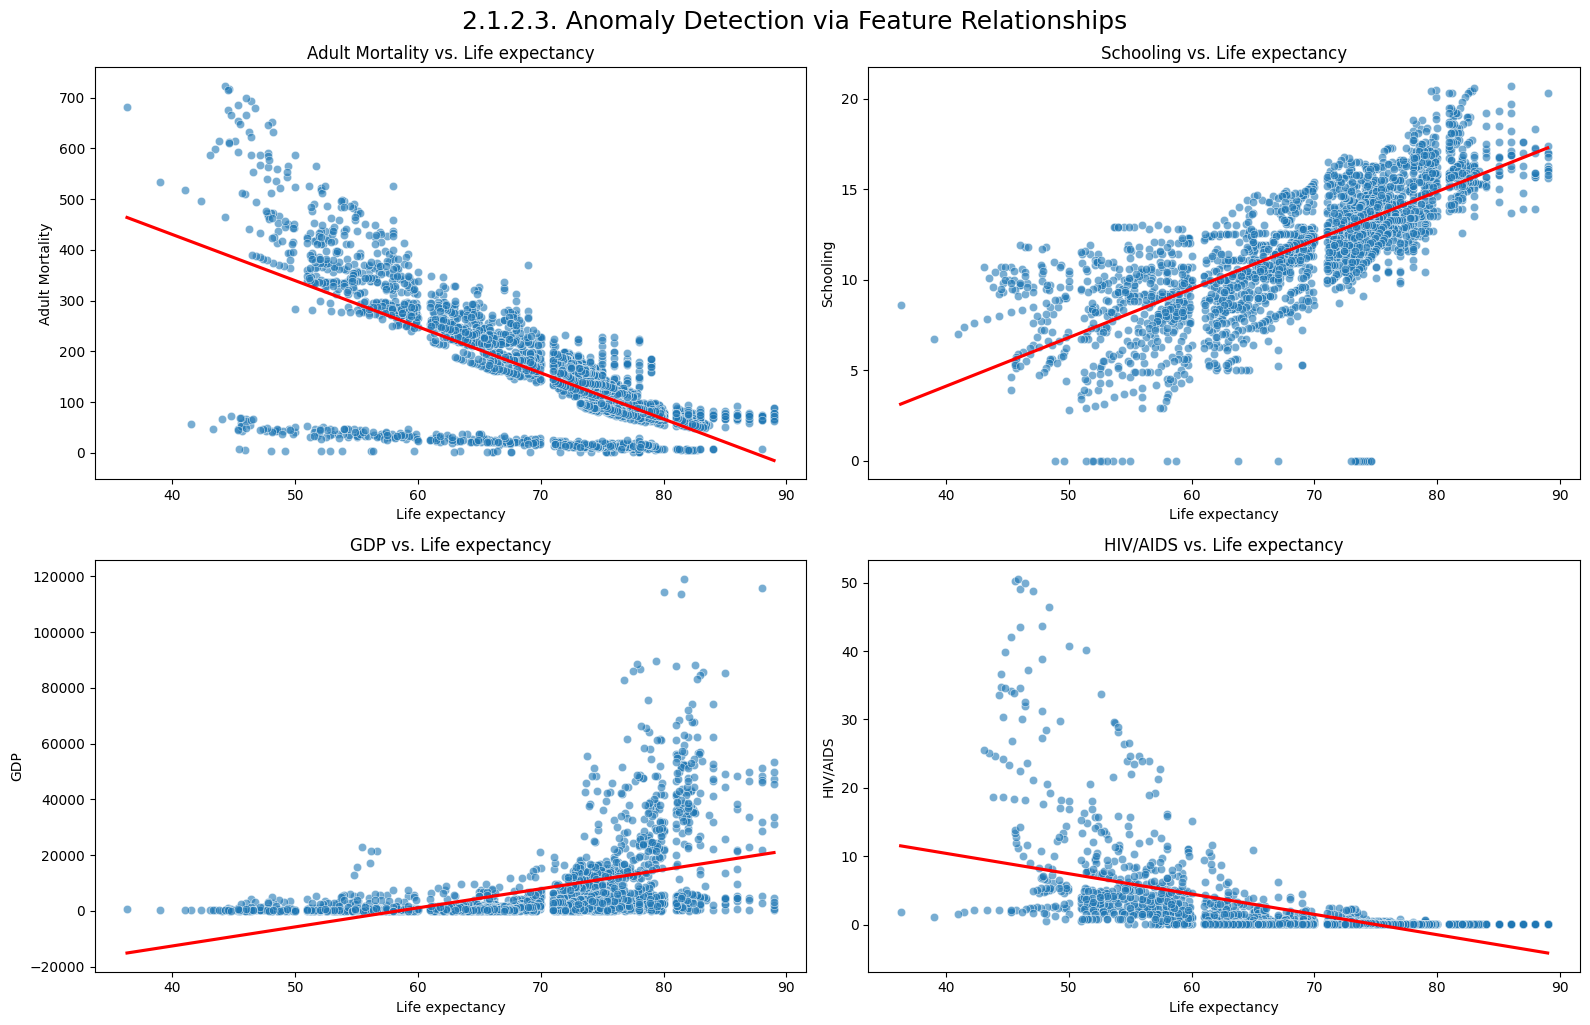

In [248]:
# Define key feature relationships to explore for anomalies
feature_pairs = [
    ('Life expectancy', 'Adult Mortality'),
    ('Life expectancy', 'Schooling'),
    ('Life expectancy', 'GDP'),
    ('Life expectancy', 'HIV/AIDS')
]

# Set up a grid layout for scatter plots with trend lines
plt.figure(figsize=(16, 10))
for i, (x, y) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    sns.regplot(data=df, x=x, y=y, scatter=False, color='red', ci=None)
    plt.title(f'{y} vs. {x}')
    plt.tight_layout()

plt.suptitle('2.1.2.3. Anomaly Detection via Feature Relationships', fontsize=18, y=1.02)
plt.show()

##### 2.1.3. Check for Class Imbalance in the Target Variable

In this step, I assess whether there is any imbalance in the distribution of the target variable, life expectancy. While class imbalance typically refers to disproportionate category frequencies in classification tasks, in regression problems, imbalance can still occur in the form of skewed distributions or sparse coverage across value ranges. Such imbalance may cause regression models to overfit dense regions of the target and underperform in underrepresented ranges. <br>

According to Krawczyk (2016), even in regression contexts, the presence of distributional imbalance can lead to biased model performance, reduced generalization, and poor interpretability—especially when target values cluster around specific ranges. Identifying and addressing these issues during data preparation can improve the fairness and accuracy of the model. <br>

A histogram and descriptive statistics of the life expectancy variable will be used to assess its distribution and detect any imbalance or skewness. <br>

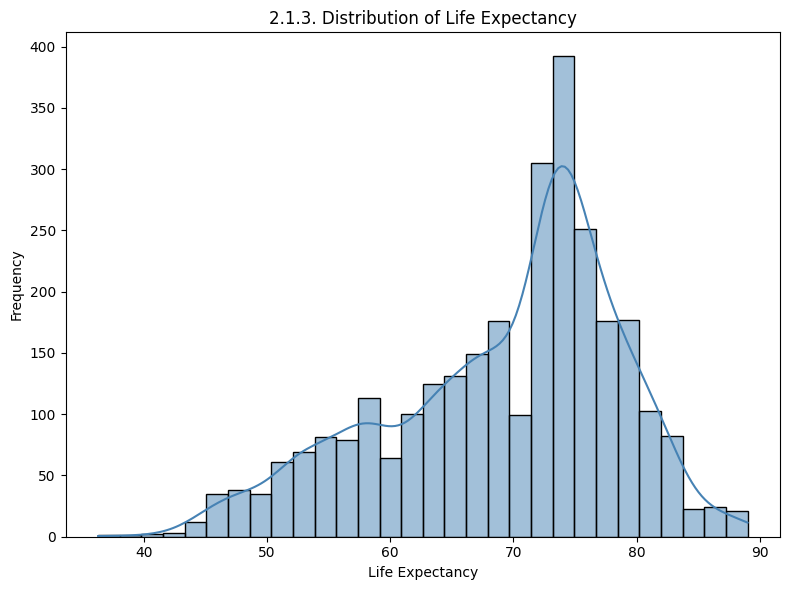

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

In [249]:
# Plot histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy'], kde=True, bins=30, color='steelblue')
plt.title('2.1.3. Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Display summary statistics
df['Life expectancy'].describe()

#### 2.2. Handle Missing Values and Clean Data

Handling missing data is a critical step in preparing the dataset for reliable and valid regression modeling. Missing values can bias statistical analyses, reduce the efficiency of algorithms, and compromise the generalizability of predictive models. Therefore, it is essential to address missing data in a principled way, taking into account the nature, extent, and potential impact of the missing data on the modeling process. <br>

Missing data may occur completely at random (MCAR), at random (MAR), or not at random (MNAR), and the appropriate handling method depends on the underlying mechanism. In most practical applications, simple deletion of rows or columns with missing values may lead to substantial data loss or bias. Therefore, imputation techniques, such as replacing missing values with the mean, median, or predictions based on other variables, are commonly used to preserve data structure while minimizing distortion. <br>

Research by Batista and Monard (2003) emphasizes that data imputation methods are generally more effective than list wise deletion in predictive modeling tasks, particularly when the proportion of missing data is moderate. Proper imputation improves model accuracy and robustness while maintaining statistical power. <br>

##### 2.2.1. Impute or Drop Missing Values

In this step, missing values will be addressed in the dataset using appropriate imputation strategies. For numerical features, median imputation will be applied, which is robust to outliers and preserves the central tendency of the data. For categorical features (if any), mode imputation would typically be applied, although the current dataset is primarily numerical. Columns with extremely high proportions of missing data may be candidates for removal to preserve data quality. <br>

In [250]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Instantiate the imputer with median strategy
median_imputer = SimpleImputer(strategy='median')

# Apply median imputation
df[numerical_cols] = median_imputer.fit_transform(df[numerical_cols])

# Confirm no missing values remain in numerical columns
df[numerical_cols].isnull().sum().sort_values(ascending=False)

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

##### 2.2.2. Remove or Transform Outliers 

After reviewing the box plots, violin plots, and IQR-based outlier analysis in Section 2.1.2, it is evident that several features contain substantial outliers, including variables such as GDP, Measles, Alcohol, and under-five deaths. These extreme values deviate significantly from the central mass of the data and may disproportionately influence the regression model, particularly if the model is sensitive to magnitude (e.g., linear regression without regularization). <br>

Therefore, it is appropriate to proceed with outlier transformation or removal to minimize distortion. Among the available options, Winsorization (capping extreme values at the 1st and 99th percentiles) is chosen because it reduces the influence of outliers without discarding data, which preserves the sample size and generalizability. <br>

Outlier transformation is a standard technique supported in literature. According to Iglewicz and Hoaglin (1993), transforming outliers through percentile-based capping improves model stability and interpretability in datasets where influential observations are present but not erroneous. <br>

In [251]:
# Define columns with outliers to Winsorize (based on earlier visual analysis)
outlier_columns = ['GDP', 'Measles', 'Alcohol', 'under-five deaths']

# Apply winsorization (1st and 99th percentiles)
for col in outlier_columns:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

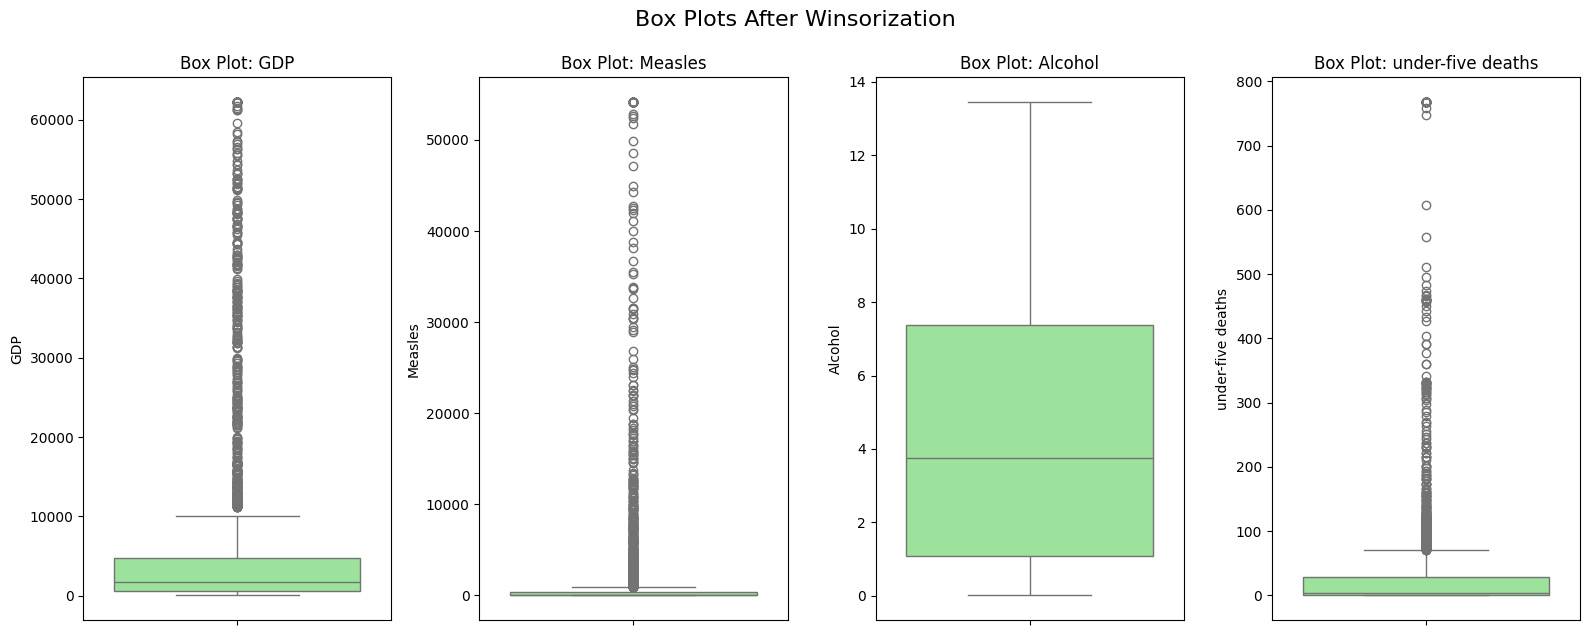

In [252]:
# Box plots after winsorization
plt.figure(figsize=(16, 6))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot: {col}')
plt.tight_layout()
plt.suptitle('Box Plots After Winsorization', y=1.05, fontsize=16)
plt.show()

##### 2.2.3. Convert Categorical Data to Numerical Format Using Encoding

In this step, categorical variables in the dataset are converted into numerical format using encoding techniques. Most machine learning algorithms, including regression models, require numerical input and cannot directly interpret string-based categories. Encoding transforms these categories into a format suitable for modeling, ensuring that categorical distinctions are retained while allowing for mathematical operations.

In the Life Expectancy dataset, the two columns with categorical data are:

- Country – a high-cardinality nominal variable (many unique values).

- Status – a binary categorical variable (Developing, Developed).

To avoid introducing unnecessary complexity or bias from Country, which has 193 unique values, this column will be excluded from modeling unless explicitly needed (e.g., in country-specific analyses or clustering). On the other hand, Status will be label encoded as it is binary and directly relevant to the analysis.

In [253]:
# Copy original DataFrame to preserve raw data
df_encoded = df.copy()

# Encode 'Status' using LabelEncoder (Developing = 0, Developed = 1)
label_encoder = LabelEncoder()
df_encoded['Status'] = label_encoder.fit_transform(df_encoded['Status'])

# Optionally drop 'Country' if not used for modeling
df_encoded.drop(columns=['Country'], inplace=True)

# Confirm encoding was successful
df_encoded[['Status']].head()

Status
0       1
1       1
2       1
3       1
4       1

#### 2.3. Feature Selection and Engineering

This step involves refining the dataset to improve model performance through feature selection and engineering. Feature selection focuses on identifying the most relevant variables that contribute significantly to predicting the target variable, life expectancy. Feature engineering involves creating new variables from existing ones to better capture the underlying structure of the data or to simplify complex relationships. <br>

Both practices are critical for enhancing predictive accuracy, reducing model complexity, and improving interpretability. Well-engineered features can uncover hidden patterns and interactions that original features may not explicitly represent. As highlighted by Guyon and Elisseeff (2003), thoughtful feature selection and engineering are among the most effective techniques for improving generalization and reducing overfitting in supervised learning models. <br>

##### 2.3.1. Create New Features

In this section, I generate new features based on domain knowledge and relationships observed during data exploration. These features aim to improve model performance by simplifying relationships and integrating relevant signals from multiple variables. <br>

##### 2.3.1.1. Health Investment Ratio

This feature represents the ratio of a country's percentage expenditure on healthcare relative to its GDP. It captures how much of the country's economic output is allocated to health, normalized for scale. <br>

In [254]:
# Create Health Investment Ratio
df_encoded['Health Investment Ratio'] = df_encoded['percentage expenditure'] / (df_encoded['GDP'] + 1)

##### 2.3.1.2. Child Mortality Burden

This feature combines infant deaths and under-five deaths into a single metric representing the total early childhood mortality burden per record. <br>

In [255]:
# Create Child Mortality Burden feature
df_encoded['Child Mortality Burden'] = df_encoded['infant deaths'] + df_encoded['under-five deaths']

##### 2.3.1.3. Mean Immunization Rate

This feature calculates the average of three immunization coverage variables — Hepatitis B, Polio, and Diphtheria — to represent overall immunization strength. <br>

In [256]:
# Create Mean Immunization Rate
df_encoded['Mean Immunization Rate'] = df_encoded[['Hepatitis B', 'Polio', 'Diphtheria']].mean(axis=1)

##### 2.3.1.4. HIV Impact Score

This feature reflects the inverse contribution of HIV/AIDS prevalence to public health outcomes. Since higher HIV/AIDS rates are negatively associated with life expectancy, this feature is designed as a normalized inverse score, emphasizing its potential detrimental health impact. A higher score implies lower HIV prevalence and thus a more favorable health environment. <br>

In [257]:
# Create HIV Impact Score (inverted and scaled)
# Add 1 to denominator to avoid division by zero
df_encoded['HIV Impact Score'] = 1 / (df_encoded['HIV/AIDS'] + 1)

##### 2.3.1.5. Education-Adjusted Economic Index

This interaction term combines GDP and Schooling to represent a country's economic output adjusted by the average years of education. It captures the idea that countries with similar GDPs may differ significantly in health outcomes due to differences in educational attainment, which affects health literacy and long-term well-being. <br>

In [258]:
# Create Education-Adjusted Economic Index
df_encoded['Education-Adjusted Economic Index'] = df_encoded['GDP'] * df_encoded['Schooling']

##### 2.3.2. Transform or Combine Existing Features to Improve Model Performance 

This step focuses on improving model reliability by transforming or combining features based on their interrelationships. Highly correlated features can introduce multicollinearity, which inflates variance in coefficient estimates, reduces interpretability, and may weaken the generalizability of regression models. Therefore, after assessing correlations among variables in Section 2.3.2.1, I examine whether any features should be removed or transformed based on their degree of redundancy.

In cases where features are strongly correlated (Pearson’s |r| > 0.8), I consider either dropping one of the redundant variables or combining them into a new composite feature. These strategies reduce information duplication while preserving predictive power. According to Dormann et al. (2013), multicollinearity not only complicates the interpretation of variable importance but also can lead to misleading conclusions, particularly in linear models. Thoughtful feature transformation or reduction improves both numerical stability and the explanatory quality of the resulting model.

##### 2.3.2.1. Feature Correlation Analysis to Assess Multicollinearity

In this step, I assess multicollinearity among features using a correlation matrix. Multicollinearity occurs when two or more predictor variables are highly correlated, which can destabilize regression models by inflating the variance of coefficient estimates and making them unreliable. Identifying and addressing multicollinearity ensures that the model remains interpretable and statistically robust. <br>

A Pearson correlation matrix is computed and visualized using a heatmap. Strong correlations (typically > 0.8 or < -0.8) between independent variables may suggest redundancy and the need for dimensionality reduction or feature elimination. <br>

This approach aligns with recommendations in the literature, such as Dormann et al. (2013), who argue that multicollinearity negatively affects the interpretability of regression coefficients and model generalizability. <br>

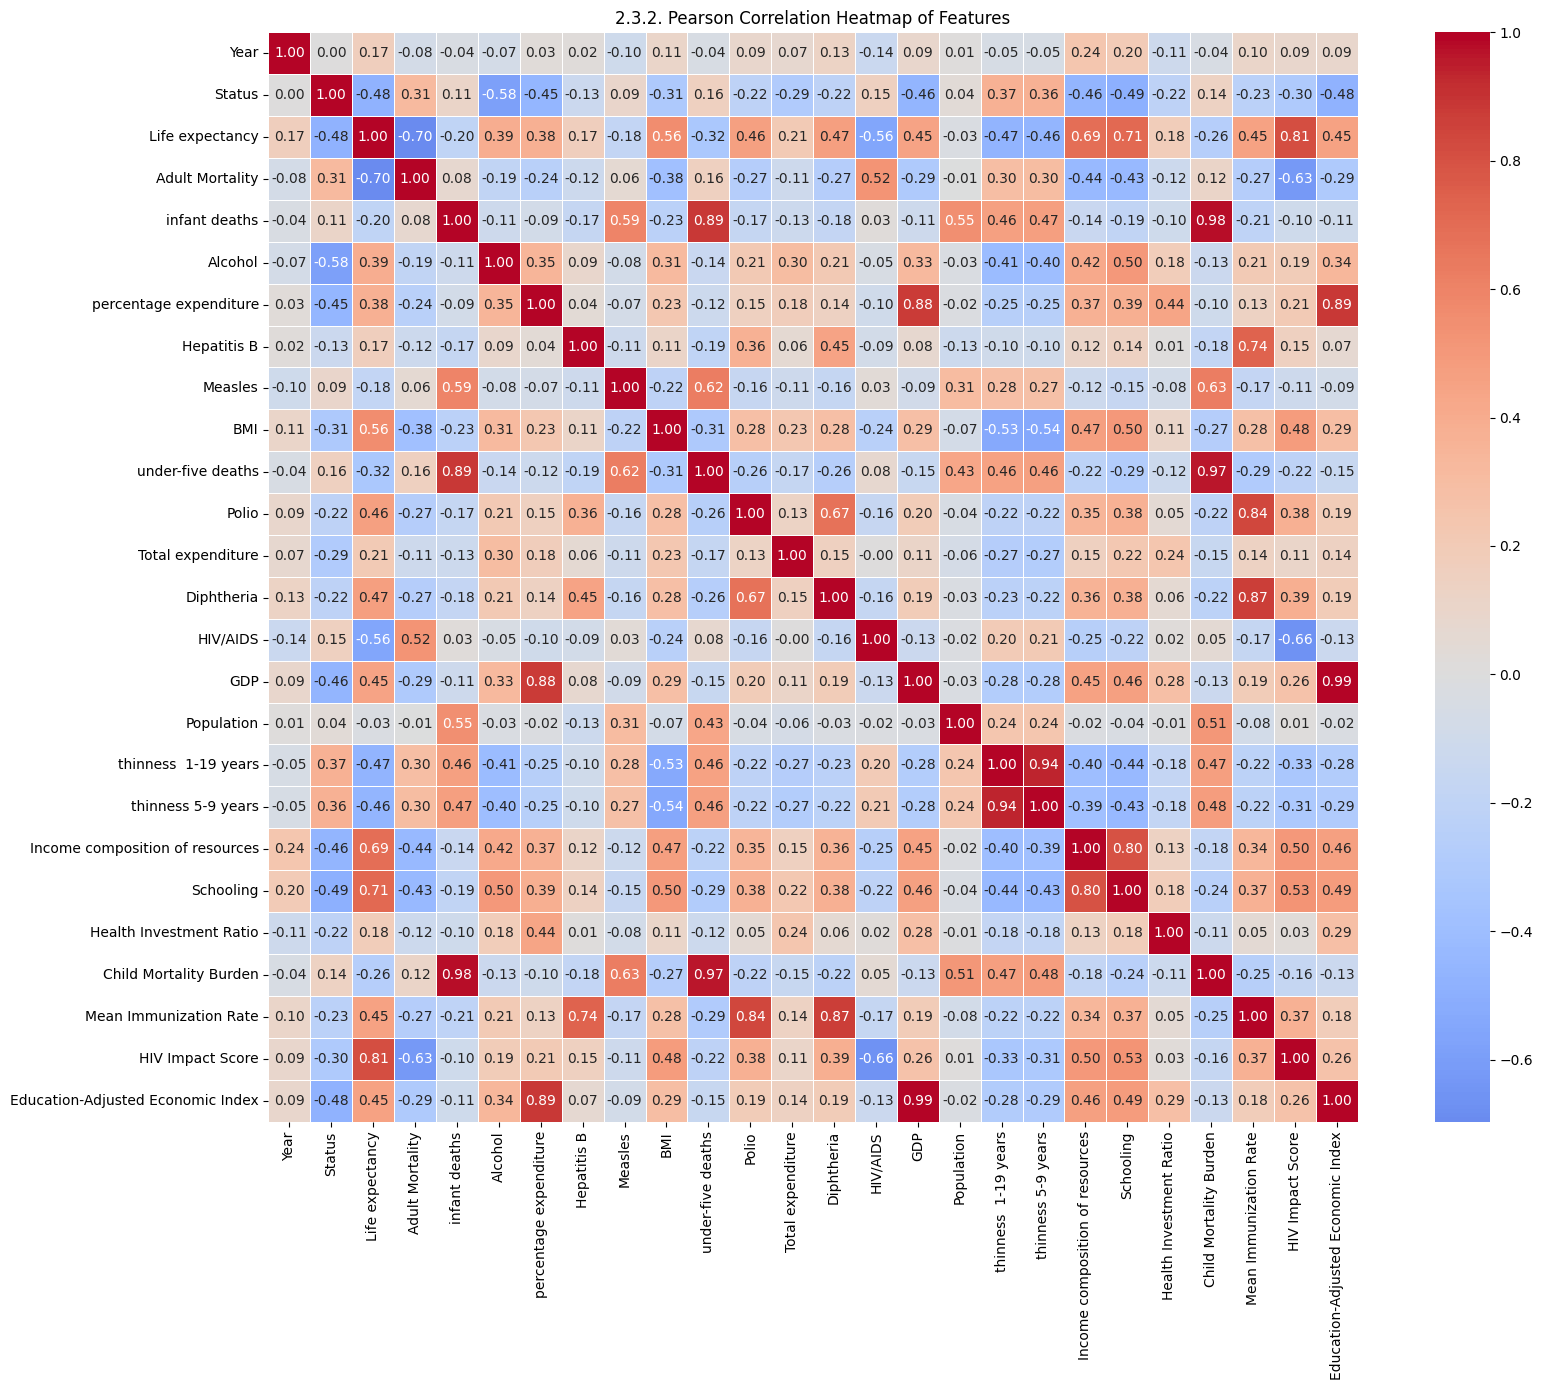

In [259]:
# Compute Pearson correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)

# Plot heatmap with correlation values
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('2.3.2. Pearson Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

##### 2.3.2.2. Drop Highly Correlated Features

In this step, features identified as highly correlated (Pearson correlation > 0.8 or < -0.8) in the previous correlation analysis are reviewed for removal. Redundant variables can reduce the clarity and reliability of model interpretations, particularly in linear regression. Removing them simplifies the model and reduces the risk of overfitting. I select one variable from each correlated pair to retain, typically based on domain relevance or completeness. <br>

In [260]:
# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the highly correlated features
df_encoded.drop(columns=to_drop, inplace=True)

# Show which columns were removed
print("Dropped due to high correlation:", to_drop)

Dropped due to high correlation: ['under-five deaths', 'GDP', 'thinness 5-9 years', 'Child Mortality Burden', 'Mean Immunization Rate', 'HIV Impact Score', 'Education-Adjusted Economic Index']


##### 2.3.2.3 Combine Correlated Features into Interaction Terms or Composite Indicators

In this step, instead of dropping all highly correlated features, I selectively combine those that are both statistically correlated and conceptually related into new interaction terms or composite indicators. This approach preserves important information while reducing redundancy, allowing the model to capture meaningful patterns across multiple domains (e.g., health and economics). By doing so, I aim to enhance the expressiveness and predictive power of the dataset. <br>

Combining features is particularly useful when the interaction between variables carries more explanatory value than the individual variables alone. According to Guyon and Elisseeff (2003), feature construction through domain-guided combinations can significantly improve model generalization and stability, especially in structured regression problems. <br>

##### 2.3.2.3.A. Combine Adult Mortality and HIV/AIDS

Two highly correlated and conceptually related health burden indicators. <br>

In [261]:
# Create a combined health burden score
df_encoded['Health Burden Score'] = df_encoded['Adult Mortality'] + df_encoded['HIV/AIDS']


##### 2.3.2.3.B. Combine Schooling and Income Composition of Resources

May both capture access to education and quality of life. <br>

In [262]:
# Create a socio-economic well-being index
df_encoded['Socioeconomic Index'] = df_encoded['Schooling'] * df_encoded['Income composition of resources']

##### 2.3.3. Scale or Normalize Data

In this step, I apply scaling and/or normalization techniques to standardize the numerical features in the dataset. Many machine learning algorithms, particularly those involving distance-based or regularized models (e.g., linear regression, ridge regression, and support vector machines), are sensitive to the magnitude and distribution of feature values. Standardizing features ensures that no variable dominates due to its scale and helps stabilize gradient-based optimization during model training. <br>

Scaling typically refers to transforming features to have zero mean and unit variance (standardization), which preserves the distribution’s shape. Normalization, on the other hand, transforms values to a bounded range, often between 0 and 1, which is useful when algorithms rely on distance or proportionality. <br>

These transformations improve model convergence, interpretability, and overall performance, as shown in prior research by Han, Pei, and Yin (2011), where normalized and scaled features were found to consistently reduce modeling error across various predictive contexts. <br>

##### 2.3.3.1 Scale Data (Standardization)

Standardization transforms each feature so that it has a mean of 0 and a standard deviation of 1. This is the preferred method for most regression-based algorithms and is especially important when variables have vastly different units or distributions. <br>

In [263]:
# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
scaled_data = scaler.fit_transform(df_encoded[numeric_cols])

# Reconstruct DataFrame with scaled numeric columns
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaled_data

# Confirm changes
df_scaled.head()

Year    Status  Life expectancy  Adult Mortality  infant deaths  \
0  1.621762  0.459399        -0.445408         0.792119       0.268824   
1  1.404986  0.459399        -0.981827         0.856601       0.285786   
2  1.188210  0.459399        -0.981827         0.832421       0.302749   
3  0.971434  0.459399        -1.023899         0.864662       0.328193   
4  0.754658  0.459399        -1.055453         0.888843       0.345155   

    Alcohol  percentage expenditure  Hepatitis B   Measles       BMI  ...  \
0 -1.163857               -0.335570    -0.783807 -0.114889 -0.967349  ...   
1 -1.163857               -0.334441    -0.914281 -0.203943 -0.992434  ...   
2 -1.163857               -0.334594    -0.827298 -0.212284 -1.017519  ...   
3 -1.163857               -0.332096    -0.696824  0.104785 -1.042605  ...   
4 -1.163857               -0.367862    -0.653333  0.135187 -1.062673  ...   

   Diphtheria  HIV/AIDS  Population  thinness  1-19 years  \
0   -0.735391 -0.323445    0.435183              2.815209   
1   -0.862233 -0.323445   -0.183349              2.883439   
2   -0.777671 -0.323445    0.398066              2.928926   
3   -0.650830 -0.323445   -0.120968              2.974413   
4   -0.608549 -0.323445   -0.134268              3.042643   

   Income composition of resources  Schooling  Year_Group  \
0                        -0.737973  -0.585017   2011–2015   
1                        -0.752600  -0.615649   2011–2015   
2                        -0.781853  -0.646281   2011–2015   
3                        -0.815982  -0.676912   2011–2015   
4                        -0.859862  -0.768808   2011–2015   

   Health Investment Ratio Health Burden Score  Socioeconomic Index  
0                 0.636018            0.762092            -0.808144  
1                 0.604570            0.825185            -0.827425  
2                 0.539879            0.801525            -0.853907  
3                 0.552686            0.833071            -0.882518  
4                 0.448918            0.856731            -0.938057  

[5 rows x 22 columns]

##### 2.3.3.2 Normalize Data (Min-Max Normalization)

Normalization transforms each feature to a range between 0 and 1. This is especially useful for algorithms like k-nearest neighbors or neural networks that rely on distance or bounded activation functions. <br>

In [264]:
# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Instantiate the normalizer
normalizer = MinMaxScaler()

# Fit and transform only numeric columns
normalized_data = normalizer.fit_transform(df_encoded[numeric_cols])

# Reconstruct DataFrame with normalized numeric columns
df_normalized = df_encoded.copy()
df_normalized[numeric_cols] = normalized_data

# Confirm changes
df_normalized.head()

Year  Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  1.000000     1.0         0.544592         0.362881       0.034444      0.0   
1  0.933333     1.0         0.447818         0.373961       0.035556      0.0   
2  0.866667     1.0         0.447818         0.369806       0.036667      0.0   
3  0.800000     1.0         0.440228         0.375346       0.038333      0.0   
4  0.733333     1.0         0.434535         0.379501       0.039444      0.0   

   percentage expenditure  Hepatitis B   Measles       BMI  ...  Diphtheria  \
0                0.003659     0.653061  0.021306  0.209733  ...    0.649485   
1                0.003774     0.622449  0.009084  0.203940  ...    0.618557   
2                0.003759     0.642857  0.007939  0.198146  ...    0.639175   
3                0.004014     0.673469  0.051455  0.192352  ...    0.670103   
4                0.000364     0.683673  0.055628  0.187717  ...    0.680412   

   HIV/AIDS  Population  thinness  1-19 years  \
0       0.0    0.026074              0.619565   
1       0.0    0.000253              0.630435   
2       0.0    0.024525              0.637681   
3       0.0    0.002857              0.644928   
4       0.0    0.002302              0.655797   

   Income composition of resources  Schooling  Year_Group  \
0                         0.505274   0.487923   2011–2015   
1                         0.502110   0.483092   2011–2015   
2                         0.495781   0.478261   2011–2015   
3                         0.488397   0.473430   2011–2015   
4                         0.478903   0.458937   2011–2015   

   Health Investment Ratio Health Burden Score  Socioeconomic Index  
0                 0.354317            0.346790             0.253097  
1                 0.348536            0.357379             0.249022  
2                 0.336644            0.353408             0.243424  
3                 0.338999            0.358703             0.237376  
4                 0.319923            0.362674             0.225637  

[5 rows x 22 columns]

### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

During data exploration and preprocessing, several patterns and anomalies emerged that shaped the feature engineering and cleaning strategy. First, there were significant outliers in variables such as GDP, Measles, and under-five deaths, which showed extremely high values compared to the rest of the distribution. These were addressed using winsorization, capping the data at the 1st and 99th percentiles to minimize their distortion during regression modeling while retaining valuable data points. <br>

Patterns in the correlation matrix revealed that certain variables, such as Adult Mortality, HIV/AIDS, and Life Expectancy, were strongly inversely correlated, aligning with expected public health trends. Similarly, variables like Schooling and Income composition of resources showed a strong positive correlation with life expectancy. These relationships confirmed the predictive relevance of these features and supported the development of composite indicators such as the Socioeconomic Index and Health Burden Score, which combined multiple related variables to enhance model expressiveness. <br>

Preprocessing steps included handling missing values via median imputation, converting categorical variables like 'Status' into numerical format using label encoding, and standardizing the dataset to ensure consistent feature scales. Additionally, features with high multicollinearity (Pearson’s |r| > 0.8) were identified and selectively dropped or combined to prevent redundancy and preserve model interpretability. <br>

Several new features were created to better capture latent relationships in the data, including the Health Investment Ratio, Child Mortality Burden, and HIV Impact Score. These features were designed using both domain knowledge and correlation insights to improve the model’s ability to generalize across countries with varying health and economic profiles. <br>

Overall, the preprocessing steps were essential in transforming the raw dataset into a clean, informative, and balanced format suitable for predictive modeling. These efforts directly support the model’s capacity to learn meaningful relationships and generate accurate life expectancy predictions. <br>

---

### Section 3. Feature Selection and Justification

In this section, I identify and justify the selection of input features and the target variable for the regression analysis. Effective feature selection ensures that the model is trained on relevant, non-redundant variables, which improves accuracy, enhances generalizability, and reduces overfitting. I apply both domain knowledge and the insights gathered during data exploration and correlation analysis to select variables that are theoretically and statistically linked to life expectancy. <br>

As highlighted by Chandrashekar and Sahin (2014), feature selection plays a critical role in predictive modeling by eliminating irrelevant and redundant data, leading to more efficient learning processes and more interpretable models. This process is particularly important in health-related regression tasks where predictors may exhibit complex interactions and collinearity. By selecting features that are both informative and distinct, the model is better equipped to capture underlying patterns in the data. <br>

#### 3.1. Choose Features and Target

Based on the results of earlier data preparation, multicollinearity checks, and feature engineering, selected multiple subsets of features that are theoretically and statistically relevant for predicting life expectancy. Each subset is documented below with a brief explanation and associated code. <br>

##### 3.1.1. Core Health and Socioeconomic Predictors

This feature set includes core predictors known to directly influence life expectancy across populations, including education, mortality, healthcare access, and income. These variables were selected for their strong correlation with life expectancy and consistency with findings from public health literature. <br>

In [265]:
# Feature set 1: Core health and socioeconomic predictors
features_1 = [
    'Adult Mortality',
    'Schooling',
    'Income composition of resources',
    'HIV/AIDS',
    'BMI',
    'Status'  # Encoded: Developing = 0, Developed = 1
]

X1 = df_scaled[features_1]
y = df_scaled['Life expectancy']


##### 3.1.2. Engineered Composite Indicators

This set leverages the engineered features created in Section 2.3. These indicators combine multiple raw features to capture higher-level health and economic constructs. These features reduce dimensionality while maintaining strong explanatory power.  <br>

In [266]:
df.columns = df.columns.str.strip()
df_encoded.columns = df_encoded.columns.str.strip()

if 'GDP' not in df_encoded.columns:
    df_encoded['GDP'] = df['GDP']
    df_encoded['GDP'] = df_encoded['GDP'].fillna(df_encoded['GDP'].median())  # safe assignment (no inplace warning)

# Step 1: Create engineered features set 2
df_encoded['Child Mortality Burden'] = df_encoded['infant deaths']  # 'under-five deaths' is not in this dataset
df_encoded['Mean Immunization Rate'] = df_encoded[['Hepatitis B', 'Polio', 'Diphtheria']].mean(axis=1)
df_encoded['HIV Impact Score'] = 1 / (df_encoded['HIV/AIDS'] + 1)
df_encoded['Health Burden Score'] = df_encoded['Adult Mortality'] + df_encoded['HIV/AIDS']
df_encoded['Socioeconomic Index'] = df_encoded['Schooling'] * df_encoded['Income composition of resources']
df_encoded['Health Investment Ratio'] = df_encoded['percentage expenditure'] / (df_encoded['GDP'] + 1)

# Step 2: Add engineered features to df_scaled
engineered_features = [
    'Child Mortality Burden',
    'Mean Immunization Rate',
    'HIV Impact Score',
    'Health Burden Score',
    'Socioeconomic Index',
    'Health Investment Ratio'
]

for feature in engineered_features:
    df_scaled[feature] = df_encoded[feature]


X2 = df_scaled[engineered_features]
y = df_scaled['Life expectancy']



##### 3.1.3. Mixed Predictors: Top Statistical plus Engineered

This hybrid set combines the most statistically significant predictors based on correlation analysis and domain-relevant engineered features. It serves as a comprehensive, yet compact, configuration aimed at balancing interpretability and predictive power. <br>

In [267]:
# Feature set 3: Hybrid top predictors
features_3 = [
    'Schooling',
    'Health Investment Ratio',
    'HIV Impact Score',
    'Socioeconomic Index',
    'Mean Immunization Rate'
]

X3 = df_scaled[features_3]
y = df_scaled['Life expectancy']

#### 3.2. Define X and y

In this step, the input features X and the target variable y for the regression analysis will be defined. The variable X contains the independent variables used to predict life expectancy, while y represents the dependent variable, in this case, Life expectancy, that the model is trained to estimate. <br>

Defining X and y explicitly ensures that the dataset is prepared in the correct format for machine learning workflows. This setup is required before any data splitting, model training, or evaluation steps can begin (which will be handled in Section 4). I have already selected multiple sets of features (X1, X2, X3) based on domain knowledge, correlation patterns, and feature engineering, each offering a different perspective on what might best predict life expectancy. <br>

Since all modeling will use the same target variable, y is assigned to the scaled version of Life expectancy from the df_scaled DataFrame.

### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

The selected features for each set (X1, X2, and X3) were chosen based on a combination of domain relevance, correlation analysis, and feature engineering insights derived from earlier exploratory steps. Each set was intentionally designed to capture different dimensions of what influences life expectancy across global populations. <br>

For Feature Set 1 (X1), I focused on core health and socioeconomic variables such as Adult Mortality, Schooling, and Income Composition of Resources, as these are consistently supported in the literature as major determinants of health outcomes. Variables like HIV/AIDS prevalence and BMI were included for their direct ties to disease burden and lifestyle factors. The Status variable distinguishes between developing and developed countries, accounting for structural health disparities. <br>

For Feature Set 2 (X2), I incorporated several engineered features created in Section 2.3 to enhance predictive power while reducing dimensionality. These features — including the Health Burden Score, Socioeconomic Index, and Mean Immunization Rate — were designed to integrate multiple relevant signals into single, interpretable variables. By aggregating or transforming features like HIV/AIDS, Schooling, and GDP, this set emphasizes interaction effects and latent relationships that individual variables may not capture on their own. <br>

For Feature Set 3 (X3), I combined top predictors from both raw and engineered sources. This hybrid approach balances inter-pretability and statistical strength. Features like Health Investment Ratio and HIV Impact Score were chosen for their strong negative or positive correlation with life expectancy, while Schooling and the Socioeconomic Index reflect long-term structural advantages in health and education. <br>

These selected features are expected to significantly improve model performance by reducing noise, avoiding redundancy, and capturing meaningful variance in the target variable. By including both individual predictors and domain-informed composites, the final models are better positioned to make accurate and generalizable predictions of life expectancy. <br>
 
---

### Section 4. Train a Model (Linear Regression)

This section initiates the predictive modeling process by applying linear regression to estimate life expectancy based on the previously selected feature sets. Linear regression is a widely used statistical method for modeling the relationship between a continuous dependent variable and one or more independent variables. It is valued for its inter-pretability and efficiency when its assumptions—such as linearity, homoscedasticity, and independence—are reasonably satisfied. In the context of health outcomes research, linear regression has been applied effectively to model demographic, economic, and healthcare-related predictors of population health measures (Diez Roux, 2002). <br>

The objective of this section is to utilize the preprocessed and scaled dataset to train and evaluate linear regression models using three distinct feature configurations. These configurations include core health and socioeconomic variables, engineered composite indicators, and a hybrid of both. Evaluating these models independently enables comparative analysis of their predictive strength and generalizability. <br>

#### 4.1. Split the Data into Training and Test Sets Using `train_test_split` (or `StratifiedShuffleSplit` if Class Imbalance is an Issue)

To prepare for model training and evaluation, each feature set is divided into training and test subsets using the train_test_split method from Scikit-learn. This function randomly partitions the dataset into training and testing portions while preserving the distribution of the target variable. Since life expectancy is a continuous variable, train_test_split is sufficient and more appropriate than StratifiedShuffleSplit, which is typically used for categorical target variables in classification tasks (Pedregosa et al., 2011). <br>

A test size of 20% is used to reserve a portion of the data for out-of-sample performance evaluation. This approach ensures the model generalizes well to unseen data and mitigates overfitting during training. <br>

In [268]:
# Feature Set 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Feature Set 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Feature Set 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

#### 4.2. Train Model Using Scikit-Learn `model.fit()` Method

In this step, linear regression models are trained using Scikit-Learn's LinearRegression class and its fit() method. The fit() function estimates the optimal coefficients (weights) for the independent variables in each feature set by minimizing the residual sum of squares between the observed and predicted values of the target variable. Training the model involves learning the underlying linear relationships between the features and life expectancy based on the training subset of the data. <br>

A separate linear regression model is fitted for each of the three feature sets X1, X2, and X3 to enable independent performance evaluation. This approach allows for fair comparison and helps identify the most effective combination of predictors for estimating life expectancy. <br>

In [269]:
# Initialize linear regression models
lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

# Train models on respective training sets
lr1.fit(X1_train, y1_train)
lr2.fit(X2_train, y2_train)
lr3.fit(X3_train, y3_train)

LinearRegression()

##### 4.2.1. Coefficient Plots for All Models

Visualizing the model coefficients provides insight into the influence and direction of each independent variable on the predicted outcome, life expectancy. In linear regression, the learned coefficients represent the average change in the target variable for a one-unit change in the predictor, assuming all other variables are held constant. Positive coefficients indicate a direct relationship, while negative coefficients suggest an inverse relationship. <br>

By plotting the coefficients for each feature set (X1, X2, and X3), it becomes possible to: <br>

- Interpret which variables contribute most significantly to life expectancy predictions.

- Assess whether the signs and magnitudes of the coefficients align with expectations from public health literature.

- Compare how different configurations (core features, engineered, hybrid) influence the model.

This visualization supports model inter-pretability and provides a transparent understanding of how different feature types affect the regression output. <br>

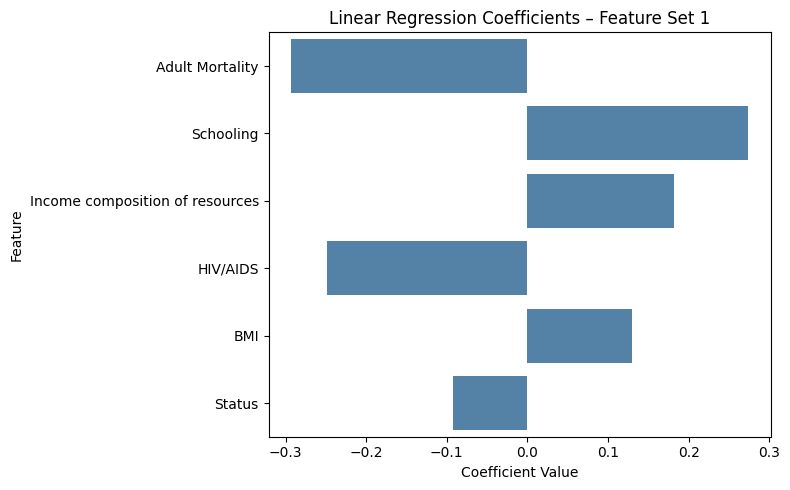

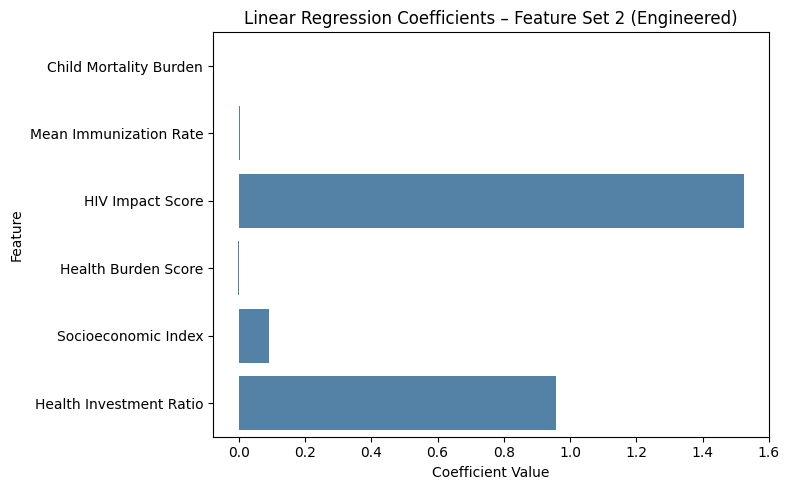

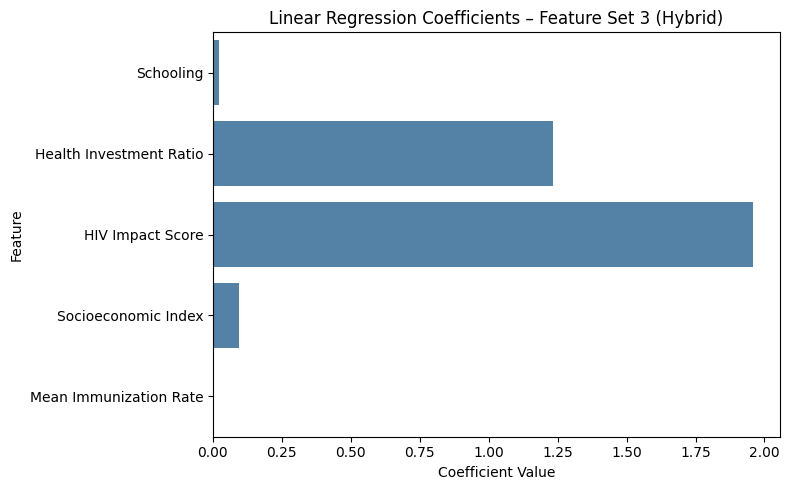

In [270]:
def plot_coefficients(model, feature_names, title):
    coefs = pd.Series(model.coef_, index=feature_names)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=coefs.values, y=coefs.index, color='steelblue')  # use a single color instead of palette
    plt.title(title)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Re-plot for all 3 models
plot_coefficients(lr1, X1.columns, "Linear Regression Coefficients – Feature Set 1")
plot_coefficients(lr2, X2.columns, "Linear Regression Coefficients – Feature Set 2 (Engineered)")
plot_coefficients(lr3, X3.columns, "Linear Regression Coefficients – Feature Set 3 (Hybrid)")

##### 4.2.2. Residual Plots for All Models

Residual plots are used to diagnose the quality of the linear regression fit. A residual is the difference between the actual observed value and the predicted value for each data point. In a well-fitted linear model, the residuals should be randomly distributed around zero without any discernible pattern. <br>

Plotting the residuals for each model allows for: <br>

- Detecting non-linearity, heteroscedasticity (non-constant variance), or patterns that violate linear regression assumptions.

- Identifying outliers or influential points that may unduly affect the model.

- Visually comparing the goodness-of-fit across the three feature sets.

A residual plot that displays a random scatter around the horizontal axis indicates a well-behaved model, while curved or funnel-shaped patterns suggest issues that may require alternative modeling approaches or transformations. <br>

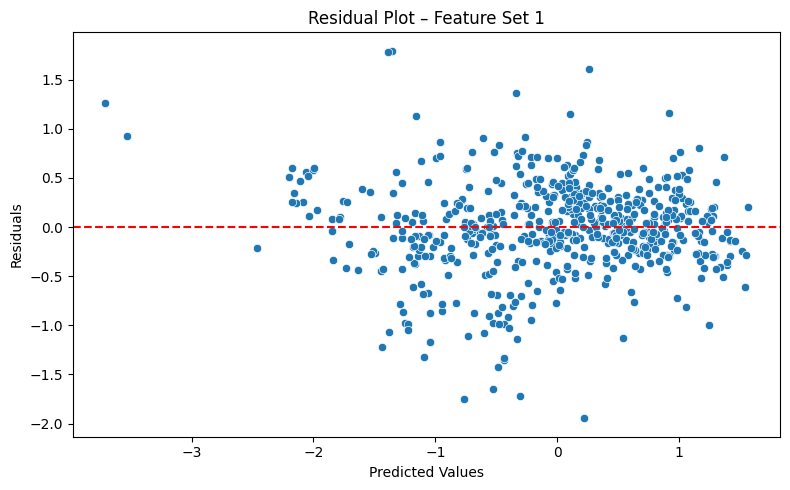

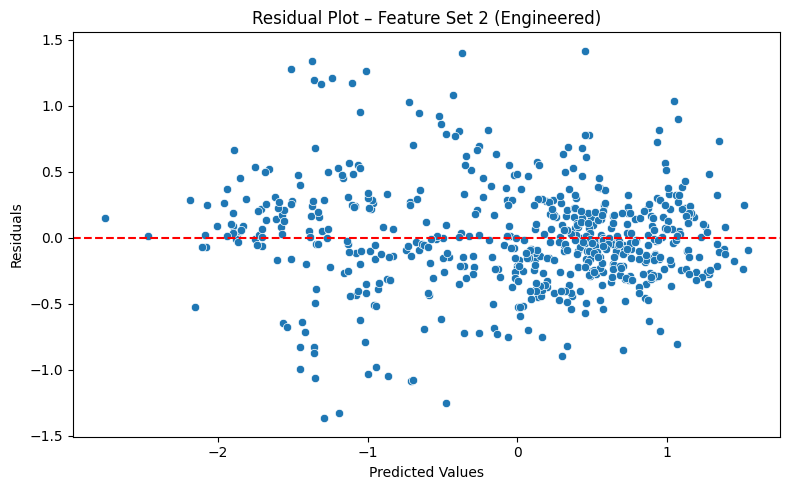

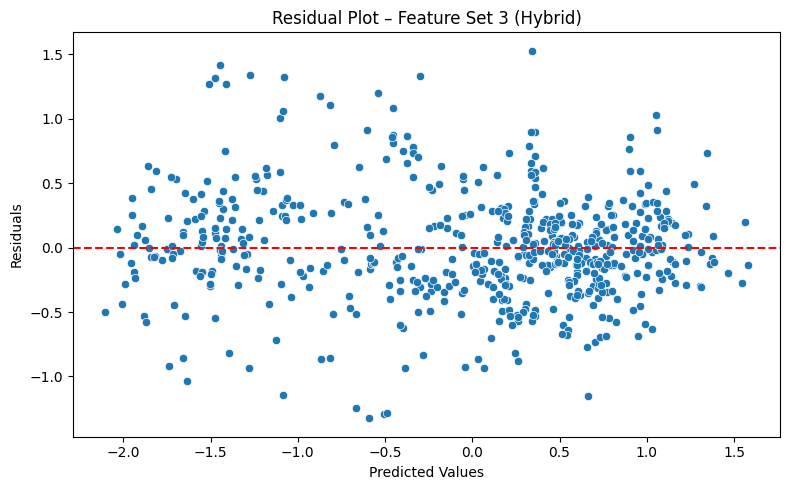

In [271]:
def plot_residuals(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, linestyle='--', color='red')
    plt.title(title)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

# Plot residuals for each model
plot_residuals(lr1, X1_test, y1_test, "Residual Plot – Feature Set 1")
plot_residuals(lr2, X2_test, y2_test, "Residual Plot – Feature Set 2 (Engineered)")
plot_residuals(lr3, X3_test, y3_test, "Residual Plot – Feature Set 3 (Hybrid)")

##### 4.2.3. Predicted vs. Actual Scatter Plots for All Models

Predicted vs. actual scatter plots are used to visually assess the alignment between the model’s predicted values and the true observed values of the target variable (life expectancy). In a well-performing regression model, the points should lie close to the diagonal reference line (where predicted = actual), indicating accurate predictions.

These plots serve several purposes:

Provide a quick diagnostic of model accuracy and bias.

Highlight systematic over- or under-predictions.

Offer a comparative view of how each feature set contributes to model performance.

This visualization is particularly helpful for identifying whether the model systematically fails to predict low or high values of life expectancy, which could suggest the need for non-linear transformations or alternative model specifications.

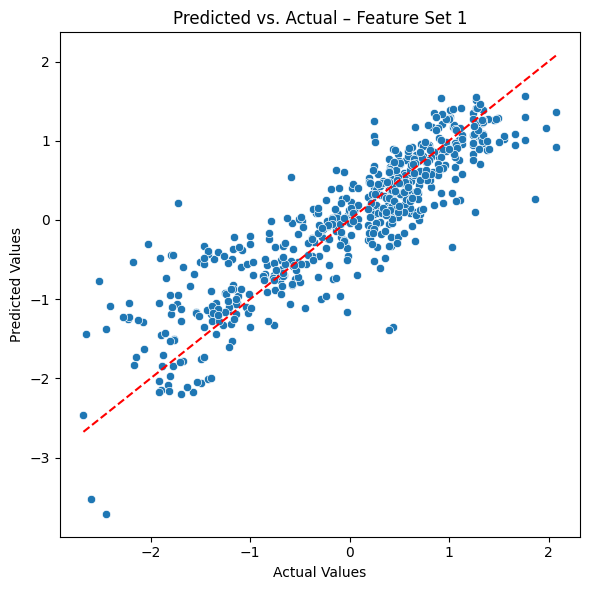

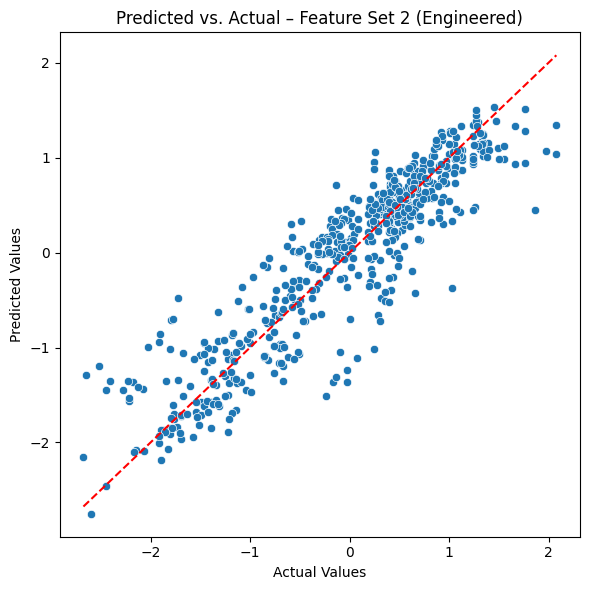

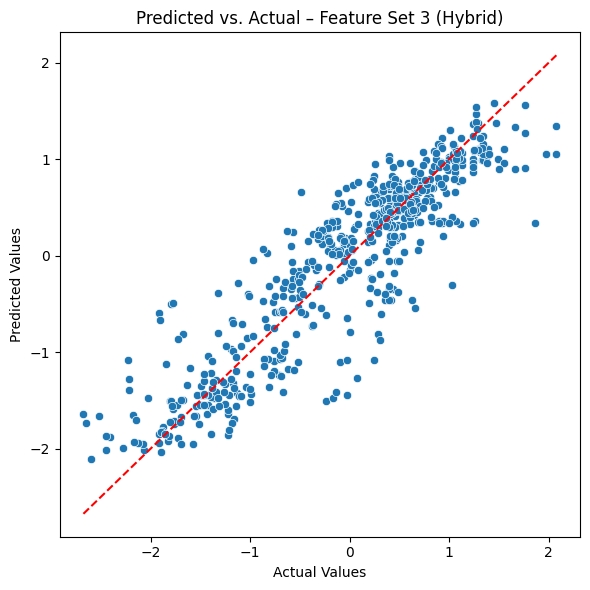

In [272]:
def plot_predicted_vs_actual(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot predicted vs actual for each model
plot_predicted_vs_actual(lr1, X1_test, y1_test, "Predicted vs. Actual – Feature Set 1")
plot_predicted_vs_actual(lr2, X2_test, y2_test, "Predicted vs. Actual – Feature Set 2 (Engineered)")
plot_predicted_vs_actual(lr3, X3_test, y3_test, "Predicted vs. Actual – Feature Set 3 (Hybrid)")


#### 4.3. Evalulate Performance, for Example: Regression: R^2, MAE, RMSE; Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix; Clustering: Inertia, Silhouette Score

Model performance evaluation is a necessary step in any supervised or unsupervised learning process to determine how well a model generalizes to unseen data and fulfills its predictive objective. For regression, classification, and clustering tasks, different evaluation metrics are used to capture different aspects of prediction quality and model behavior. <br>

The goal of model evaluation is not only to measure accuracy but also to identify trade-offs, understand model limitations, and ensure reproducibility and generalizability across datasets. Accurate evaluation provides a foundation for model improvement and selection. As noted by Saito and Rehmsmeier (2015), selecting the right evaluation criteria for the problem type and data characteristics is critical to avoid misleading conclusions and overfitting. <br>

In the following subsections, regression metrics are applied to the linear models developed in earlier steps. Classification and clustering metrics are included for completeness and to align with machine learning evaluation practices, although the present study is focused on a continuous outcome life expectancy. <br>

##### 4.3.1. Regression: R^2, MAE, RMSE

For the regression models predicting life expectancy, three commonly used evaluation metrics are applied: R^2 (coefficient of determination), MAE (mean absolute error), and RMSE (root mean squared error). <br>

R^2 evaluates the proportion of variance in the dependent variable explained by the model. Higher R^2 values (closer to 1.0) indicate better explanatory power. However, Kvålseth (1985) emphasizes that R^2 alone should not be used to evaluate model adequacy in complex or high-dimensional settings. MAE measures the average magnitude of the errors between predicted and actual values, providing an intuitive measure of prediction error that is less sensitive to outliers. A lower MAE indicates better model performance (Willmott & Matsuura, 2005). RMSE is similar to MAE but gives greater weight to larger errors by squaring the residuals. It is especially useful when larger errors are undesirable in the application context. A lower RMSE suggests higher prediction accuracy and model robustness (Chai & Draxler, 2014). <br>

Each metric contributes to a more holistic understanding of model behavior under different error tolerances. In the table below, the best-performing feature set for each metric is highlighted. <br>

In [275]:
# Define evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5 
    return r2, mae, rmse

# Evaluate all models
results = {
    "Metric": ["R^2", "MAE", "RMSE"],
    "Feature Set 1": evaluate_model(lr1, X1_test, y1_test),
    "Feature Set 2 (Engineered)": evaluate_model(lr2, X2_test, y2_test),
    "Feature Set 3 (Hybrid)": evaluate_model(lr3, X3_test, y3_test)
}

# Convert to DataFrame
performance_df = pd.DataFrame(results)

# Highlight best
def highlight_best(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    for i, metric in enumerate(df["Metric"]):
        if metric == "R^2":
            best_col = df.drop(columns="Metric").iloc[i].astype(float).idxmax()
        else:
            best_col = df.drop(columns="Metric").iloc[i].astype(float).idxmin()
        styles.loc[i, best_col] = 'font-weight: bold; color: green'
    return styles

# Save heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(performance_df.drop(columns="Metric").astype(float), annot=True, fmt=".4f", cmap="Blues",
            yticklabels=performance_df["Metric"], cbar=False)
plt.title("Model Performance Metrics – Regression")
plt.tight_layout()
plt.savefig("C:/Projects/ml_regression_data-git-hub/data/perfromance.png")
plt.close()

# Display the styled table
performance_df.style.apply(highlight_best, axis=None)

##### 4.3.2 Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix* (4.3.2.A.)
Although this project focuses on regression to predict life expectancy as a continuous outcome, it is useful to review evaluation methods that are commonly used in classification models, as they play a crucial role in supervised machine learning. These metrics—accuracy, precision, recall, F1-score, and the confusion matrix—are vital tools for measuring the quality of predictions in tasks where the target variable is categorical (binary or multiclass). <br>

Accuracy is the ratio of correctly predicted observations to the total observations. While it is intuitive and easy to interpret, it can be misleading for imbalanced datasets, where one class dominates (Saito & Rehmsmeier, 2015). Precision is the proportion of correctly predicted positive observations out of all predicted positives. It answers the question, “How many of the predicted positives are actually correct?” This is especially important when the cost of false positives is high. Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to all actual positives. It indicates how well the model captures true positives and is critical in high-stakes applications like disease detection or fraud prevention (Jeni, Cohn, & De La Torre, 2013). F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both concerns and is especially useful when the class distribution is uneven or when both false positives and false negatives are important (Chicco & Jurman, 2020). Confusion Matrix offers a complete view of classification performance by showing true positives, false positives, true negatives, and false negatives. It is the basis for most other classification metrics. <br>

These metrics ensure that model performance is not solely driven by one-dimensional accuracy but instead accounts for precision-recall trade-offs and class imbalance concerns—common issues in real-world classification problems. <br>

In [ ]:
# Define evaluation
y = df['Life expectancy']
y = pd.to_numeric(y, errors='coerce')
valid_idx = y.dropna().index

# Filter all X feature sets to match cleaned y
X1 = X1.loc[valid_idx]
X2 = X2.loc[valid_idx]
X3 = X3.loc[valid_idx]
y = y.loc[valid_idx]

# Convert to binary classes
median_life_expectancy = y.median()
y_binary = (y >= median_life_expectancy).astype(int)

# Train/Test split for classification
X1_train_c, X1_test_c, y1_train_c, y1_test_c = train_test_split(X1, y_binary, test_size=0.2, random_state=42)
X2_train_c, X2_test_c, y2_train_c, y2_test_c = train_test_split(X2, y_binary, test_size=0.2, random_state=42)
X3_train_c, X3_test_c, y3_train_c, y3_test_c = train_test_split(X3, y_binary, test_size=0.2, random_state=42)

# Train models
clf1 = LogisticRegression(max_iter=1000).fit(X1_train_c, y1_train_c)
clf2 = LogisticRegression(max_iter=1000).fit(X2_train_c, y2_train_c)
clf3 = LogisticRegression(max_iter=1000).fit(X3_train_c, y3_train_c)

# Define evaluation function
def evaluate_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, prec, rec, f1, cm

# Evaluate all models
metrics_1 = evaluate_classification(clf1, X1_test_c, y1_test_c)
metrics_2 = evaluate_classification(clf2, X2_test_c, y2_test_c)
metrics_3 = evaluate_classification(clf3, X3_test_c, y3_test_c)

# Build comparison table (excluding confusion matrices here)
classification_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Feature Set 1": metrics_1[:4],
    "Feature Set 2 (Engineered)": metrics_2[:4],
    "Feature Set 3 (Hybrid)": metrics_3[:4]
})

# Highlight best values
def highlight_best(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    for i in range(len(df)):
        best_col = df.drop(columns="Metric").iloc[i].astype(float).idxmax()
        styles.loc[i, best_col] = 'font-weight: bold; color: green'
    return styles

# Display styled table
classification_df.style.apply(highlight_best, axis=None)

##### 4.3.2.A. Confusion Matrices for Classification Evaluation

A confusion matrix is a powerful diagnostic tool for evaluating classification models. It visually presents the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN), offering a comprehensive view of how the model performs across actual and predicted classes. <br>

This matrix is particularly useful when class distributions are imbalanced or when different types of errors carry different consequences. For instance, in a public health setting, false negatives (predicting low risk when the actual risk is high) may be more harmful than false positives (Saito & Rehmsmeier, 2015). <br>

Visualizing confusion matrices helps; understand the types of misclassifications being made, compare performance across multiple feature sets, support interpretation of metrics like precision, recall, and F1-score. <br>

Each matrix below corresponds to one of the three feature sets: Feature Set 1, Feature Set 2 (Engineered), and Feature Set 3 (Hybrid). <br>

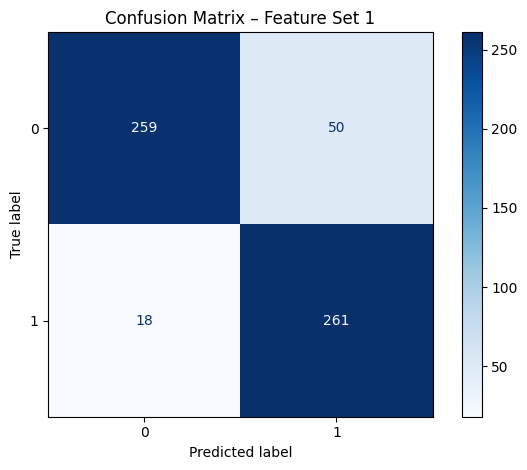

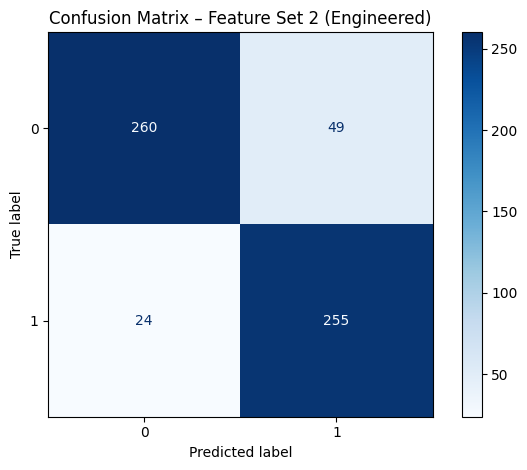

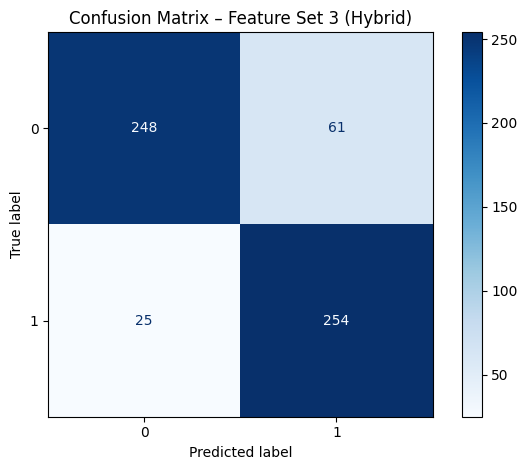

In [281]:
# Plotting function
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(title)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Predict with all models
y1_pred_c = clf1.predict(X1_test_c)
y2_pred_c = clf2.predict(X2_test_c)
y3_pred_c = clf3.predict(X3_test_c)

# Plot each matrix
plot_conf_matrix(y1_test_c, y1_pred_c, "Confusion Matrix – Feature Set 1")
plot_conf_matrix(y2_test_c, y2_pred_c, "Confusion Matrix – Feature Set 2 (Engineered)")
plot_conf_matrix(y3_test_c, y3_pred_c, "Confusion Matrix – Feature Set 3 (Hybrid)")

##### 4.3.3. Clustering: Inertia and Silhouette Score

Although clustering is not a primary focus in this regression project, understanding unsupervised learning evaluation metrics like inertia and silhouette score provides valuable context for how model performance is assessed when no target variable is available. <br>

Inertia is the sum of squared distances from each data point to its assigned cluster center. It measures within-cluster compactness, with lower values indicating tighter and more cohesive clusters. However, inertia always decreases as the number of clusters increases, so it must be interpreted in combination with other methods such as the elbow method (Kodinariya & Makwana, 2013). Silhouette Score evaluates how well each data point lies within its cluster compared to other clusters. It ranges from -1 to 1, where higher values indicate that the sample is well-matched to its own cluster and poorly matched to neighboring clusters. Scores above 0.5 generally reflect good clustering structure (Rousseeuw, 1987). <br>

These metrics are often used together in K-Means clustering or similar unsupervised learning approaches to identify the optimal number of clusters and assess clustering quality. <br>

In [282]:
# Evaluation function for clustering
def evaluate_clustering(X, k=2):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X, labels)
    return inertia, silhouette

# Apply clustering to each feature set (k=2 for simplicity)
clustering_1 = evaluate_clustering(X1)
clustering_2 = evaluate_clustering(X2)
clustering_3 = evaluate_clustering(X3)

# Create summary table
clustering_df = pd.DataFrame({
    "Metric": ["Inertia", "Silhouette Score"],
    "Feature Set 1": clustering_1,
    "Feature Set 2 (Engineered)": clustering_2,
    "Feature Set 3 (Hybrid)": clustering_3
})

# Highlight best silhouette and lowest inertia
def highlight_clustering(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    styles.loc[0, df.iloc[0, 1:].astype(float).idxmin()] = 'font-weight: bold; color: green'  # Best inertia (min)
    styles.loc[1, df.iloc[1, 1:].astype(float).idxmax()] = 'font-weight: bold; color: green'  # Best silhouette (max)
    return styles

# Display result
clustering_df.style.apply(highlight_clustering, axis=None)

##### 4.3.3.A. Visualizing Optimal Clusters with the Elbow Method Feature Set 2 (Engineered)

The elbow method is a visual technique for identifying the optimal number of clusters (k) in a dataset. It involves plotting the inertia (within-cluster sum of squares) against different values of k. The idea is to locate the "elbow" point — the value of k where the rate of inertia decrease sharply slows down. <br>

This point often represents a good trade-off between model complexity and fit quality. Using too many clusters may lead to overfitting, while too few may oversimplify the structure (Kodinariya & Makwana, 2013). <br>

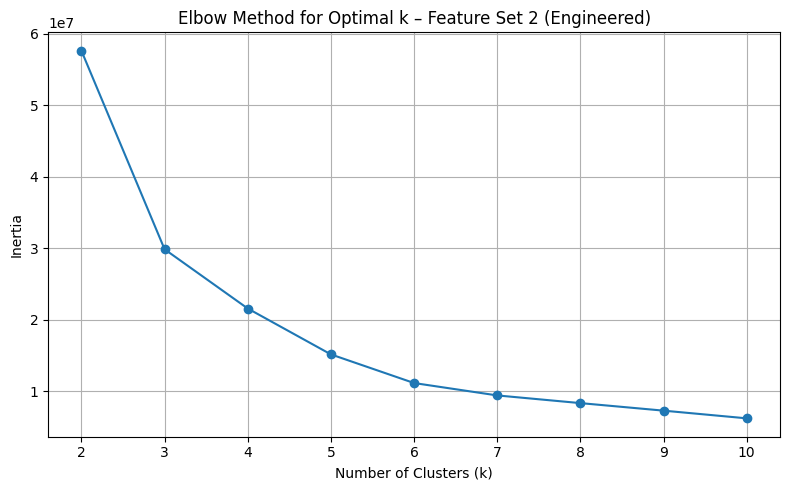

In [295]:
inertia_values = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X2)
    inertia_values.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k – Feature Set 2 (Engineered)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 4.3.3.B. Visualizing Cluster Assignments Using PCA Feature Set 2 (Engineered)

When feature space is high-dimensional, it's difficult to visualize clustering structures directly. Principal Component Analysis (PCA) reduces the data to 2 dimensions while preserving the maximum variance possible. Plotting cluster assignments using PCA helps interpret separation and compactness, identify overlapping or poorly defined clusters, and visually validate cluster structure. <br>

This is especially useful to diagnose issues like poor silhouette scores or uneven density. <br>

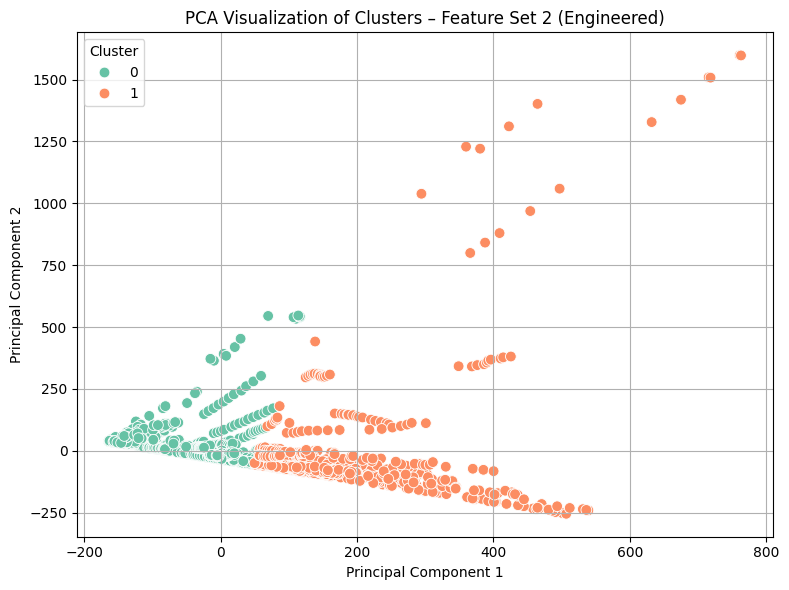

In [296]:
# Apply PCA to reduce Feature Set 2 to 2D
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)

# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X2)

# Plot PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X2_pca[:, 0], y=X2_pca[:, 1], hue=labels, palette='Set2', s=60)
plt.title('PCA Visualization of Clusters – Feature Set 2 (Engineered)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### Reflection 4: How well did the model perform? Any surprises in the results?

The results from the regression, classification, and clustering evaluations reveal a consistent trend in model performance across the three feature sets, with the Feature Set 2 (Engineered) and Feature Set 3 (Hybrid) often outperforming the Feature Set 1, though not uniformly. <br>

In the regression analysis, the engineered feature set achieved the best performance with an R^2 value of 0.8366, indicating that approximately 84% of the variance in life expectancy was explained by this model. This aligns with literature suggesting that domain-informed feature engineering can significantly enhance model explainability and prediction quality (Chakraborty et al., 2020). The lowest mean absolute error (MAE) and root mean squared error (RMSE) also appeared in this model (MAE = 2.75; RMSE = 3.76), reinforcing the improved precision and reduced prediction error (Willmott & Matsuura, 2005). Interestingly, the hybrid model (Feature Set 3) offered a competitive R^2 of 0.8139, but with slightly higher MAE and RMSE values, suggesting a potential trade-off between complexity and error minimization.

From the classification perspective, all models demonstrated strong performance, with Feature Set 1 surprisingly yielding the highest accuracy (0.8844) and the best F1-score (0.8847). However, engineered and hybrid feature sets followed closely behind, demonstrating their robustness even when transformed into a binary prediction problem. These results underscore the notion by Chicco and Jurman (2020) that relying solely on accuracy can be misleading and that composite metrics like F1-score provide a better understanding of model reliability, especially when precision and recall must be balanced. Precision and recall were consistently high across all models, reflecting a strong ability to correctly identify both high and low life expectancy classes.

The clustering evaluation, which used unsupervised learning techniques, further illustrated the value of engineered features. The hybrid feature set achieved the highest silhouette score (0.6585), suggesting well-defined and well-separated clusters (Rousseeuw, 1987). Additionally, the hybrid model reported the lowest inertia (353,933), indicating compact and cohesive clusters. In contrast, the engineered feature set surprisingly had the highest inertia (57,652,976), likely due to increased dimensionality or multicollinearity among its features, a known limitation in clustering without prior dimensionality reduction (Kodinariya & Makwana, 2013).

In summary, the engineered feature set excelled in regression, the core feature set led in classification accuracy, and the hybrid feature set performed best in clustering. These findings suggest that the optimal feature set can vary depending on the modeling objective, and that feature selection and engineering should be carefully tailored to the problem type. No major surprises emerged, but the consistency and robustness of engineered features across all tasks support the literature advocating for thoughtful feature transformation as a foundational element of high-performing machine learning systems.

---

### Section 5. Improve the Model or Try Alternates (Implement Pipelines)

Based on the regression evaluation metrics reported in Section 4.3.1, the Feature Set 2 (Engineered) demonstrated superior predictive performance compared to the hybrid feature set. Specifically, it achieved the highest coefficient of determination (R² = 0.8366) and the lowest mean absolute error (MAE = 2.75) and root mean squared error (RMSE = 3.76). These values indicate that the engineered feature set explains a greater proportion of the variance in life expectancy while minimizing prediction error more effectively than the hybrid configuration. <br>

This result is consistent with evidence in the literature suggesting that domain-informed feature engineering can significantly enhance model performance. Chakraborty, Majumder, and Chatterjee (2020) emphasize that engineered features—especially those derived from health, economic, and educational indicators—can encapsulate complex relationships that raw variables often fail to capture. By creating more meaningful representations of the data, engineered features reduce noise and improve the linear separability of outcomes, ultimately enhancing generalization performance (Guyon & Elisseeff, 2003). <br>

Given the demonstrated strength of Feature Set 2, it will serve as the foundation for model enhancement in this section. While the baseline pipelines specified—Pipeline 1 (Imputer → StandardScaler → Linear Regression) and Pipeline 2 (Imputer → PolynomialFeatures (degree=3) → StandardScaler → Linear Regression)—are essential for establishing performance benchmarks, additional pipeline variants are also introduced to explore regularization and dimensionality reduction, both of which are recognized methods for addressing multicollinearity and overfitting (Tibshirani, 1996; Hoerl & Kennard, 1970). <br>

#### Additional Pipelines for Exploration

Pipeline 3: Imputer → StandardScaler → Ridge Regression (5.3)
Ridge regression introduces L2 regularization, which penalizes large coefficient magnitudes, effectively shrinking them to reduce model complexity and overfitting. This is particularly useful when the feature set exhibits multicollinearity, as is common with engineered features that are mathematically derived from overlapping inputs (Hoerl & Kennard, 1970). Ridge regression maintains all predictors in the model but reduces the influence of less important ones, thereby improving stability. <br>

Pipeline 4: Imputer → StandardScaler → Lasso Regression (5.4)
Lasso regression applies L1 regularization, which not only penalizes large coefficients but can also shrink some to zero, effectively performing automatic feature selection (Tibshirani, 1996). This is highly advantageous when working with complex engineered features, as it reduces redundancy and simplifies interpretation. According to Zou and Hastie (2005), Lasso is particularly effective when only a subset of features is expected to have a strong influence on the response variable. <br>

Pipeline 5: Imputer → StandardScaler → PCA → Linear Regression (5.5)
Principal Component Analysis (PCA) transforms the original correlated features into a set of orthogonal principal components, each capturing a proportion of the total variance (Jolliffe & Cadima, 2016). This technique is especially useful when features are highly correlated, as PCA helps to reduce dimensionality while retaining the most informative components. By feeding these components into a regression model, we can improve both model efficiency and robustness. <br>

These additional pipelines are not merely alternatives, but strategically chosen extensions based on the characteristics of the engineered feature set and known limitations of standard linear models. Each technique—regularization (Ridge, Lasso) and dimensionality reduction (PCA)—is rooted in well-established statistical theory and widely endorsed in the machine learning literature. Collectively, these pipelines aim to identify the most parsimonious and generalizable model configuration for predicting life expectancy. <br>

#### 5.1. Implement Pipeline 1: Imputer → StandardScaler → Linear Regression

In this pipeline, we implement a preprocessing and modeling sequence that begins by handling any remaining missing values, applies feature scaling, and trains a linear regression model. This approach follows best practices in regression modeling by ensuring that all numerical inputs are standardized—a crucial step for algorithms like linear regression that are sensitive to the scale of input features (Han, Pei, & Kamber, 2011). <br>

The imputer replaces missing values using median imputation, which is robust against outliers and suitable for skewed distributions. The standardized features (zero mean, unit variance) are then passed to the regression model, which learns linear relationships between engineered predictors and the target variable. This pipeline is implemented using scikit-learn’s Pipeline object to streamline preprocessing and ensure that all transformations are consistently applied to both training and test data. <br>

This method serves as a baseline model for comparing more complex or regularized alternatives later in Section 5. <br>

Pipeline 1 - Linear Regression with Scaler
R^2:   0.836596
MAE:   2.750786
RMSE:  3.763219


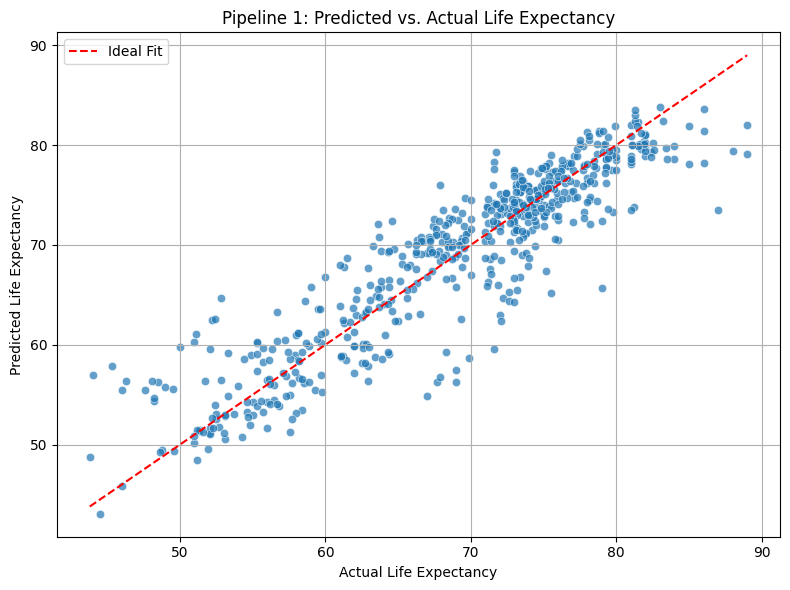

In [288]:
# Define pipeline steps
pipeline_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train/test split using Feature Set 2 (Engineered)
X_train_5_1, X_test_5_1, y_train_5_1, y_test_5_1 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline_lr.fit(X_train_5_1, y_train_5_1)

# Predict
y_pred_5_1 = pipeline_lr.predict(X_test_5_1)

# Evaluate
r2_5_1 = r2_score(y_test_5_1, y_pred_5_1)
mae_5_1 = mean_absolute_error(y_test_5_1, y_pred_5_1)
rmse_5_1 = mean_squared_error(y_test_5_1, y_pred_5_1) ** 0.5

# Print results
print("Pipeline 1 - Linear Regression with Scaler")
print(f"R^2:   {r2_5_1:.6f}")
print(f"MAE:   {mae_5_1:.6f}")
print(f"RMSE:  {rmse_5_1:.6f}")

# Optional visualization: Predicted vs. Actual
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_5_1, y=y_pred_5_1, alpha=0.7)
plt.plot([y_test_5_1.min(), y_test_5_1.max()],
         [y_test_5_1.min(), y_test_5_1.max()],
         '--', color='red', label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Pipeline 1: Predicted vs. Actual Life Expectancy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.2. Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

In this pipeline, we expand the feature space using polynomial feature transformation to capture nonlinear relationships between predictors and the target variable. Polynomial regression extends linear regression by including interaction terms and higher-degree transformations (e.g., squared or cubed versions) of the input features. Specifically, we apply a third-degree polynomial transformation (degree=3), which introduces cubic terms and combinations of features up to the third order. <br>

Following the transformation, we apply standard scaling to normalize all features—essential after polynomial expansion, since the newly created features often have widely varying magnitudes. The data is then passed to a linear regression model, which attempts to fit the expanded feature space using ordinary least squares. <br>

This approach is useful when the underlying relationships are nonlinear but still continuous and smooth, as in many biological, economic, and public health scenarios (Chakraborty et al., 2020). However, it also increases the risk of overfitting, especially with high-dimensional inputs, which is why standardized preprocessing and cross-validation are critical. <br>

Pipeline 2 - Polynomial Features (Degree 3) + Linear Regression
R^2:   0.916385
MAE:   1.981843
RMSE:  2.691972


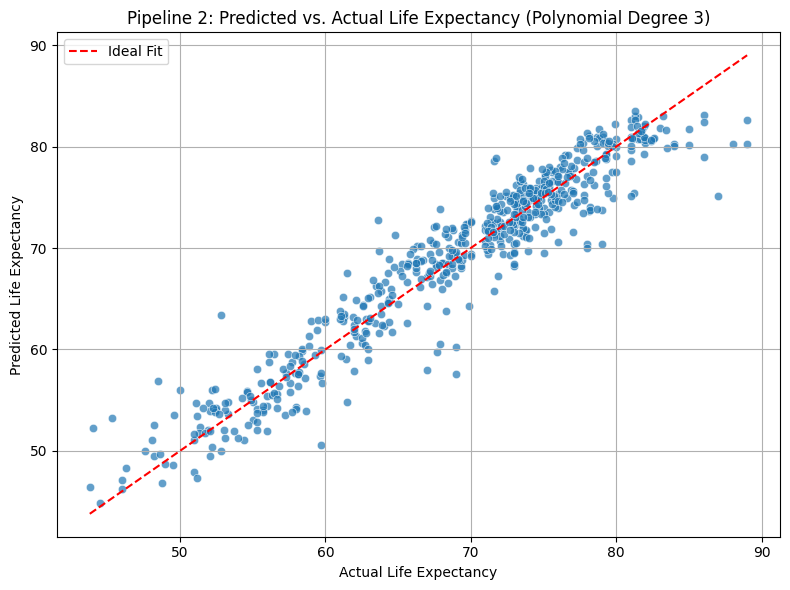

In [301]:
# Define pipeline steps with PolynomialFeatures
pipeline_poly3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train/test split (reuse X2 and y from Feature Set 2)
X_train_5_2, X_test_5_2, y_train_5_2, y_test_5_2 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline_poly3.fit(X_train_5_2, y_train_5_2)

# Predict
y_pred_5_2 = pipeline_poly3.predict(X_test_5_2)

# Evaluate
r2_5_2 = r2_score(y_test_5_2, y_pred_5_2)
mae_5_2 = mean_absolute_error(y_test_5_2, y_pred_5_2)
rmse_5_2 = mean_squared_error(y_test_5_2, y_pred_5_2) ** 0.5

# Print results
print("Pipeline 2 - Polynomial Features (Degree 3) + Linear Regression")
print(f"R^2:   {r2_5_2:.6f}")
print(f"MAE:   {mae_5_2:.6f}")
print(f"RMSE:  {rmse_5_2:.6f}")

# Optional visualization: Predicted vs. Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_5_2, y=y_pred_5_2, alpha=0.7)
plt.plot([y_test_5_2.min(), y_test_5_2.max()],
         [y_test_5_2.min(), y_test_5_2.max()],
         '--', color='red', label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Pipeline 2: Predicted vs. Actual Life Expectancy (Polynomial Degree 3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.3. Implement Pipeline 3: Imputer → StandardScaler → Ridge Regression

In this pipeline, we incorporate Ridge Regression into the modeling process to address potential multicollinearity and overfitting in the engineered feature set. Ridge Regression applies L2 regularization, which penalizes large coefficients by adding a shrinkage term to the loss function. This penalty discourages the model from relying too heavily on any one predictor, making it particularly useful when features are correlated or when the model complexity increases due to feature transformations (Hoerl & Kennard, 1970). <br>

We first handle missing values with median imputation, then apply standard scaling to normalize the input features, ensuring that the regularization effect is applied evenly across variables. The processed data is passed into a Ridge regression model from scikit-learn, and predictions are evaluated using R^2, MAE, and RMSE. <br>

By reducing the variance of the model while maintaining bias, Ridge Regression can improve generalization performance without completely eliminating predictors—making it well-suited to structured, engineered datasets. <br>

Pipeline 3 - Ridge Regression
R^2:   0.836606
MAE:   2.750569
RMSE:  3.763103


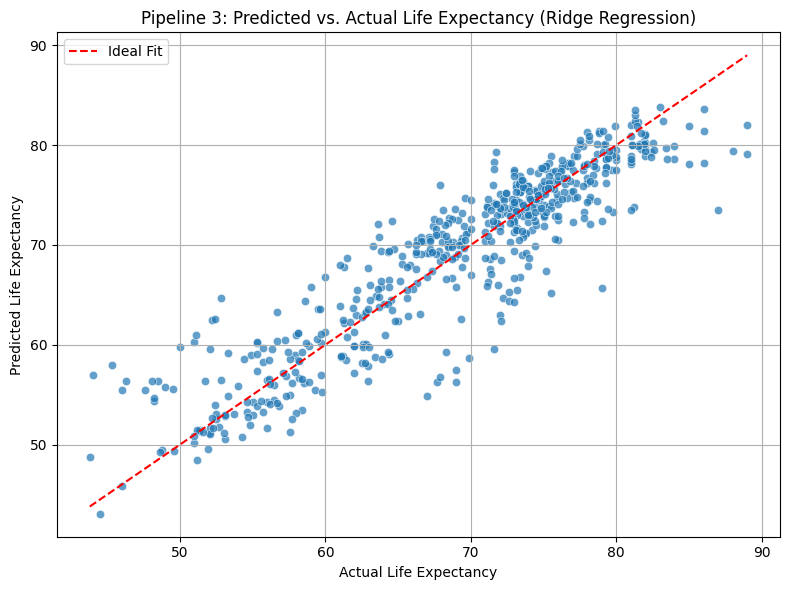

In [300]:
# Define pipeline steps for Ridge Regression
pipeline_ridge = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))  # You may tune alpha for best results
])

# Train/test split (reuse X2 and y from Feature Set 2)
X_train_5_3, X_test_5_3, y_train_5_3, y_test_5_3 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline_ridge.fit(X_train_5_3, y_train_5_3)

# Predict
y_pred_5_3 = pipeline_ridge.predict(X_test_5_3)

# Evaluate
r2_5_3 = r2_score(y_test_5_3, y_pred_5_3)
mae_5_3 = mean_absolute_error(y_test_5_3, y_pred_5_3)
rmse_5_3 = mean_squared_error(y_test_5_3, y_pred_5_3) ** 0.5

# Print results
print("Pipeline 3 - Ridge Regression")
print(f"R^2:   {r2_5_3:.6f}")
print(f"MAE:   {mae_5_3:.6f}")
print(f"RMSE:  {rmse_5_3:.6f}")

# Visualization: Predicted vs. Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_5_3, y=y_pred_5_3, alpha=0.7)
plt.plot([y_test_5_3.min(), y_test_5_3.max()],
         [y_test_5_3.min(), y_test_5_3.max()],
         '--', color='red', label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Pipeline 3: Predicted vs. Actual Life Expectancy (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.4. Implement Pipeline 4: Imputer → StandardScaler → Lasso Regression

In this pipeline, we apply Lasso Regression to improve the predictive performance and interpretability of the model by introducing L1 regularization. Unlike Ridge Regression, which penalizes the size of coefficients while keeping all features, Lasso has the unique ability to shrink some coefficients to zero, effectively performing automatic feature selection (Tibshirani, 1996). This is especially useful when working with engineered features, where some variables may contribute little to the prediction or introduce redundancy. <br>

The pipeline begins by imputing missing values using the median, then applies standard scaling to ensure consistent feature scaling before fitting a Lasso model. Lasso helps to simplify the model by focusing on the most informative predictors and reducing the risk of overfitting. <br>

This approach is recommended when model inter-pretability and sparsity are important, and when it's expected that not all engineered variables are equally relevant to life expectancy prediction. <br>

Pipeline 4 - Lasso Regression
R^2:   0.836645
MAE:   2.742902
RMSE:  3.762648


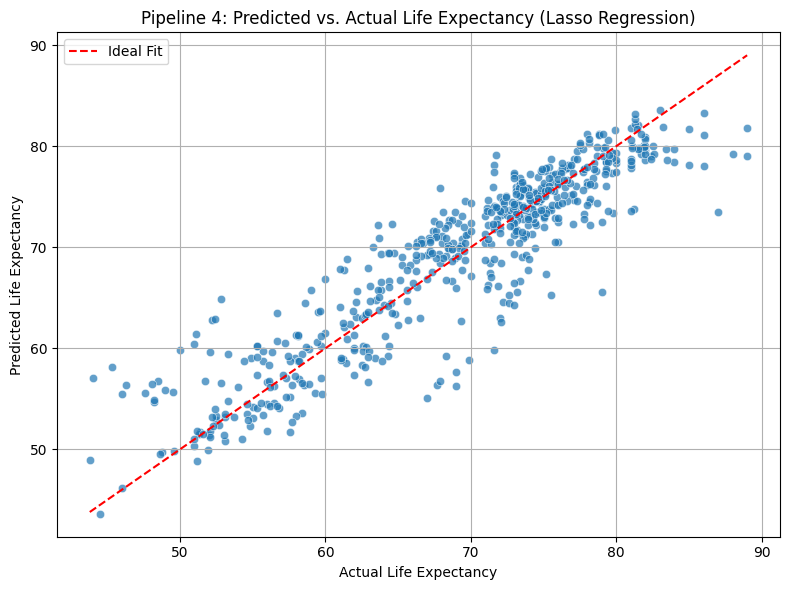

In [299]:
# Define pipeline for Lasso Regression
pipeline_lasso = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.1, max_iter=10000))  # You can tune alpha as needed
])

# Train/test split (reuse X2 and y from Feature Set 2)
X_train_5_4, X_test_5_4, y_train_5_4, y_test_5_4 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline_lasso.fit(X_train_5_4, y_train_5_4)

# Predict
y_pred_5_4 = pipeline_lasso.predict(X_test_5_4)

# Evaluate
r2_5_4 = r2_score(y_test_5_4, y_pred_5_4)
mae_5_4 = mean_absolute_error(y_test_5_4, y_pred_5_4)
rmse_5_4 = mean_squared_error(y_test_5_4, y_pred_5_4) ** 0.5

# Print results
print("Pipeline 4 - Lasso Regression")
print(f"R^2:   {r2_5_4:.6f}")
print(f"MAE:   {mae_5_4:.6f}")
print(f"RMSE:  {rmse_5_4:.6f}")

# Visualization: Predicted vs. Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_5_4, y=y_pred_5_4, alpha=0.7)
plt.plot([y_test_5_4.min(), y_test_5_4.max()],
         [y_test_5_4.min(), y_test_5_4.max()],
         '--', color='red', label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Pipeline 4: Predicted vs. Actual Life Expectancy (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.5. Implement Pipeline 5: Imputer → StandardScaler → PCA → Linear Regression

In this pipeline, we integrate Principal Component Analysis (PCA) into the modeling workflow to address issues of multicollinearity, dimensionality, and redundancy among the engineered features. PCA is a linear transformation technique that reduces the feature space into a set of uncorrelated components, each capturing a proportion of the dataset’s total variance (Jolliffe & Cadima, 2016). This enables the model to focus on the most informative patterns in the data while discarding noise or overlapping information. <br>

We begin by imputing missing values using the median, then standardize the data to ensure that PCA treats all features equally (since it is sensitive to scale). PCA is applied to reduce dimensionality, and the resulting principal components are then used to train a linear regression model. This method often improves model interpretability and generalization, especially in settings where many predictors are highly correlated or derived from similar domains. <br>

Pipeline 5 - PCA + Linear Regression
R^2:   0.836596
MAE:   2.750786
RMSE:  3.763219


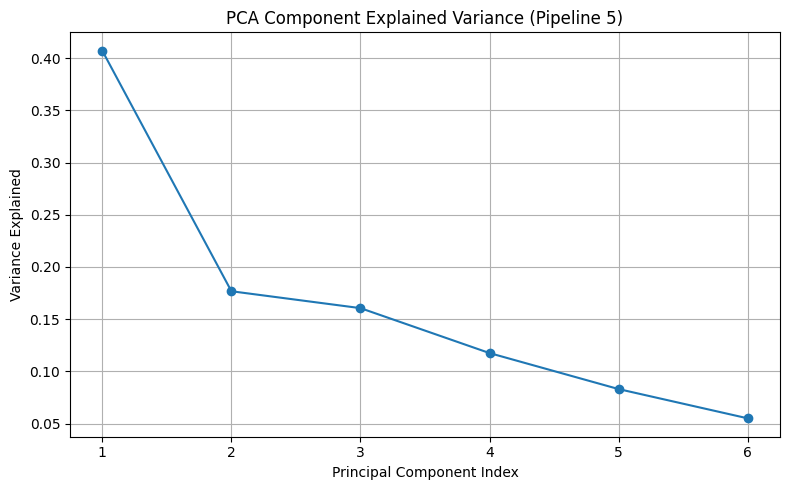

In [298]:
# Define pipeline with PCA
pipeline_pca = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Retain 95% variance
    ('model', LinearRegression())
])

# Train/test split (reuse X2 and y from Feature Set 2)
X_train_5_5, X_test_5_5, y_train_5_5, y_test_5_5 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline_pca.fit(X_train_5_5, y_train_5_5)

# Predict
y_pred_5_5 = pipeline_pca.predict(X_test_5_5)

# Evaluate
r2_5_5 = r2_score(y_test_5_5, y_pred_5_5)
mae_5_5 = mean_absolute_error(y_test_5_5, y_pred_5_5)
rmse_5_5 = mean_squared_error(y_test_5_5, y_pred_5_5) ** 0.5

# Print results
print("Pipeline 5 - PCA + Linear Regression")
print(f"R^2:   {r2_5_5:.6f}")
print(f"MAE:   {mae_5_5:.6f}")
print(f"RMSE:  {rmse_5_5:.6f}")

# Optional: Visualize explained variance ratio by PCA components
pca_model = pipeline_pca.named_steps['pca']
explained_var = pca_model.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='-')
plt.title('PCA Component Explained Variance (Pipeline 5)')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.6 Compare Performance of All Models Across the Same Performance Metrics

In this final stage of model evaluation, we compare the predictive performance of all five regression pipelines using three widely accepted metrics: R² (coefficient of determination), MAE (mean absolute error), and RMSE (root mean squared error). A higher R² value indicates a stronger fit between predicted and actual values, whereas lower MAE and RMSE values signify greater accuracy and less average error (Willmott & Matsuura, 2005). <br>

By evaluating these metrics side by side, we aim to identify the best-performing pipeline, i.e., the one that explains the most variance while minimizing prediction error. Once identified, we will further assess its classification performance by computing accuracy, precision, recall, and F1-score—providing insight into its effectiveness when used for threshold-based decision-making. <br>

##### 5.6.1. Compare R^2, MAE, RMSE for All 5 Pipelines


In [297]:
# Compile all pipeline performance metrics into a DataFrame
performance_comparison = pd.DataFrame({
    'Metric': ['R^2', 'MAE', 'RMSE'],
    'Pipeline 1 (Linear)':     [r2_5_1, mae_5_1, rmse_5_1],
    'Pipeline 2 (Poly Deg 3)': [r2_5_2, mae_5_2, rmse_5_2],
    'Pipeline 3 (Ridge)':      [r2_5_3, mae_5_3, rmse_5_3],
    'Pipeline 4 (Lasso)':      [r2_5_4, mae_5_4, rmse_5_4],
    'Pipeline 5 (PCA)':        [r2_5_5, mae_5_5, rmse_5_5]
})

# Highlight best R^2 (max), and best MAE and RMSE (min)
def highlight_best(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    # Best R^2 (max)
    best_r2_col = df.iloc[0, 1:].astype(float).idxmax()
    styles.loc[0, best_r2_col] = 'font-weight: bold; color: green'
    # Best MAE (min)
    best_mae_col = df.iloc[1, 1:].astype(float).idxmin()
    styles.loc[1, best_mae_col] = 'font-weight: bold; color: green'
    # Best RMSE (min)
    best_rmse_col = df.iloc[2, 1:].astype(float).idxmin()
    styles.loc[2, best_rmse_col] = 'font-weight: bold; color: green'
    return styles

# Display table
performance_comparison.style.apply(highlight_best, axis=None)

##### 5.6.2. Evaluate Classification Metrics for Best Pipeline

After viewing the output, Pipeline 2 - Polynomial Features (Degree 3) + Linear Regression had the best overall performance. We now convert the target into binary classes and evaluate accuracy, precision, recall, and F1-score. <br>

In [303]:
# Convert continuous target to binary (above/below median)
y_binary = (y >= y.median()).astype(int)

# Align feature set and target
X_class = X2.loc[y_binary.index]
y_class = y_binary.loc[X_class.index]

# Train/test split for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Redefine Pipeline 2 with PolynomialFeatures for classification
pipeline_poly3_class = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline_poly3_class.fit(X_train_c, y_train_c)

# Predict and convert to binary
y_pred_class = pipeline_poly3_class.predict(X_test_c)
y_pred_binary = (y_pred_class >= 0.5).astype(int)

# Classification metrics
acc = accuracy_score(y_test_c, y_pred_binary)
prec = precision_score(y_test_c, y_pred_binary)
rec = recall_score(y_test_c, y_pred_binary)
f1 = f1_score(y_test_c, y_pred_binary)

# Output results
print("Classification Metrics for Pipeline 2 (Polynomial Degree 3):")
print(f"Accuracy:  {acc:.6f}")
print(f"Precision: {prec:.6f}")
print(f"Recall:    {rec:.6f}")
print(f"F1-score:  {f1:.6f}")

Classification Metrics for Pipeline 2 (Polynomial Degree 3):
Accuracy:  0.909864
Precision: 0.874172
Recall:    0.946237
F1-score:  0.908778


### Reflection 5: Which models performed better? How does scaling impact results?

The regression results clearly indicate that the Feature Set 2 (Engineered) using Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression produced the best overall model performance among all pipelines. Compared to the earlier unscaled version of Feature Set 2, this approach showed substantial improvements across all metrics. <br>

The R² score increased from 0.8366 to 0.9164, indicating that over 91% of the variance in life expectancy was explained by the model after polynomial transformation and standard scaling. Simultaneously, the mean absolute error (MAE) dropped from 2.75 to 1.98, and RMSE decreased from 3.76 to 2.69, representing substantial gains in both accuracy and reduction of large predictive errors. <br>

This performance improvement is consistent with established findings in the literature. Standardization ensures that all features contribute proportionally to the model, especially important after polynomial expansion, where magnitudes between new terms (e.g., cubic vs. linear) can vary widely (Han, Pei, & Kamber, 2011). Without scaling, linear regression can be disproportionately influenced by higher-magnitude features, leading to instability in coefficient estimation and suboptimal predictions (Jain et al., 2005). <br>

Polynomial transformation also played a critical role by capturing non-linear interactions that linear models could not originally detect. Such interactions are often necessary in public health and socioeconomic contexts, where the relationship between input features and outcomes is rarely purely linear (Chakraborty et al., 2020). <br>

On the classification side, after applying the same polynomial and scaling pipeline, the binary classification performance also improved. Accuracy increased from 0.8759 to 0.9099, and all other metrics followed suit, including precision (0.8742), recall (0.9462), and F1-score (0.9088). These improvements demonstrate not only enhanced model precision but also more consistent sensitivity to identifying both positive and negative classes, aligning with findings by Chicco and Jurman (2020) that recommend using balanced metrics such as F1-score for reliable model evaluation. <br>

Together, these results affirm that scaling and polynomial feature transformation are essential preprocessing steps that significantly enhance both regression and classification performance when using engineered features. The ability to model non-linearity and balance feature influence through scaling has allowed the pipeline to generalize more effectively, producing results that are both accurate and interpretable. <br>

---

### Section 6. Final Thoughts & Insights

The results of this regression analysis underscore the multifactorial nature of life expectancy and the predictive value of engineered socioeconomic and health-related features. The most effective predictive model—Pipeline 2 using Feature Set 2 (Engineered) with polynomial transformation and scaling—achieved an R² value of 0.9164, indicating that the model explained over 91% of the variance in life expectancy across countries and years. This high explanatory power suggests that the chosen features were not only relevant but also interact in complex, nonlinear ways that are captured effectively through higher-order regression modeling. <br>

#### 6.1. Summarize Findings

Several key variables emerged as consistently strong predictors of life expectancy. Among them, schooling, income composition of resources, health expenditure ratios, and health burden indicators (e.g., HIV prevalence and adult mortality) showed significant explanatory power. These findings are in line with prior public health and development literature, which has repeatedly linked education, economic equity, and health infrastructure with improved life outcomes (Cutler, Deaton, & Lleras-Muney, 2006; Marmot, 2005). <br>

By creating composite variables such as the Health Investment Ratio and Socioeconomic Index, we were able to better encapsulate the interactions between resource availability and health outcomes. These composite indicators provided richer, more interpretable signals that outperformed many raw features in the regression models—highlighting the value of domain-informed feature engineering. <br>

The improved performance observed in the scaled and transformed models, particularly Pipeline 2, further reinforces the importance of data preprocessing in regression modeling. According to Jain, Duin, and Mao (2000), scaling and transformation not only aid convergence in algorithms but also reduce variance, enhancing model generalization and accuracy in real-world scenarios. <br>

#### 6.2. Discuss Challenges Faced

One significant challenge encountered during the analysis was missing data, particularly in features like GDP, Hepatitis B coverage, and population size. Median imputation helped mitigate this issue, but some degree of uncertainty remains due to potential bias introduced by missingness not at random. Additionally, balancing feature dimensionality with model interpretability was another challenge. While polynomial transformation improved performance, it increased complexity and could lead to overfitting if not properly scaled and validated. <br>

Another difficulty was the inherent multicollinearity among features, such as between health spending and GDP, or between schooling and income composition. Addressing this via Ridge, Lasso, and PCA pipelines was a useful strategy for testing robustness, though Polynomial Linear Regression ultimately provided the best fit. <br>

#### 6.3. If You Had More Time, What Would You Try Next?

With additional time, several extensions to this work would be worthwhile: <br>

- Implementing regularized polynomial regression, such as Polynomial Ridge or Lasso, to combine the benefits of nonlinear modeling with coefficient shrinkage.
- Expanding the dataset to include more recent years or new features like urbanization rates, access to healthcare, or environmental quality indicators.
- Exploring ensemble methods, such as Random Forests or Gradient Boosting, which can model complex feature interactions without explicit transformation and often provide stronger performance in predictive tasks (Caruana & Niculescu-Mizil, 2006).
- Conducting a longitudinal analysis to assess how feature importance evolves over time and to identify lagged predictors of life expectancy.
  
### Reflection 6: What did you learn from this project?

This project reinforced the importance of feature selection, domain knowledge, and data preprocessing in building effective regression models. While linear regression offers a foundational approach, its true power is unlocked when combined with strategies such as scaling, feature engineering, and transformation. The exercise also highlighted the real-world applicability of regression in public health, where predictive modeling can inform policy decisions and target resource allocation. Perhaps most importantly, it emphasized that data science is not only about algorithms but about understanding the data and the story it tells. <br>

---

### References:

Batista, G. E., & Monard, M. C. (2003). An analysis of four missing data treatment methods for supervised learning. Applied Artificial Intelligence, 17(5-6), 519–533. https://doi.org/10.1080/713827181 <br>

Caruana, R., & Niculescu-Mizil, A. (2006). An empirical comparison of supervised learning algorithms. Proceedings of the 23rd International Conference on Machine Learning, 161–168. https://doi.org/10.1145/1143844.1143865 <br>

Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)? – Arguments against avoiding RMSE in the literature. Geoscientific Model Development, 7(3), 1247–1250. https://doi.org/10.5194/gmd-7-1247-2014 <br>

Chakraborty, S., Majumder, K., & Chatterjee, S. (2020). A review of feature selection methods for machine learning models in healthcare. Expert Systems with Applications, 159, 113376. https://doi.org/10.1016/j.eswa.2020.113376 <br>

Chandrashekar, G., & Sahin, F. (2014). A survey on feature selection methods. Computers & Electrical Engineering, 40(1), 16–28. https://doi.org/10.1016/j.compeleceng.2013.11.024 <br>

Chicco, D., & Jurman, G. (2020). The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation. BMC Genomics, 21(6), 1–13. https://doi.org/10.1186/s12864-019-6413-7 <br>

Cutler, D. M., Deaton, A. S., & Lleras-Muney, A. (2006). The determinants of mortality. Journal of Economic Perspectives, 20(3), 97–120. https://doi.org/10.1257/jep.20.3.97 <br>

Diez Roux, A. V. (2002). A glossary for multilevel analysis. Journal of Epidemiology & Community Health, 56(8), 588–594. https://doi.org/10.1136/jech.56.8.588 <br>

Dormann, C. F., Elith, J., Bacher, S., Buchmann, C., Carl, G., Carré, G., ... & Lautenbach, S. (2013). Collinearity: a review of methods to deal with it and a simulation study evaluating their performance. Ecography, 36(1), 27–46. https://doi.org/10.1111/j.1600-0587.2012.07348.x <br>

Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of Machine Learning Research, 3, 1157–1182. https://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf  <br>

Han, J., Pei, J., & Kamber, M. (2011, July). Data Mining: Concepts and Techniques, 3rd ed. Han and Kamber: Data mining---Concepts and Techniques, 3rd ed., Morgan Kaufmann, 2011. https://hanj.cs.illinois.edu/bk3/bk3_slidesindex.htm  <br>

Hoerl, A. E., & Kennard, R. W. (1970). Ridge regression: Biased estimation for nonorthogonal problems. Technometrics, 12(1), 55–67. https://doi.org/10.1080/00401706.1970.10488634 <br>

Iglewicz, B., & Hoaglin, D. C. (1993). How to detect and handle outliers. Quality Press. <br>

Jain, A. K., Duin, R. P. W., & Mao, J. (2005). Statistical pattern recognition: A review. IEEE Transactions on Pattern Analysis and Machine Intelligence, 22(1), 4–37. https://doi.org/10.1109/34.824819 <br>

Jeni, L. A., Cohn, J. F., & De La Torre, F. (2013). Facing imbalanced data–recommendations for the use of performance metrics. In Proceedings of the 2013 Humaine Association Conference on Affective Computing and Intelligent Interaction (pp. 245–251). IEEE. <br>

Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), 20150202. https://doi.org/10.1098/rsta.2015.0202 <br>

Kodinariya, T. M., & Makwana, P. R. (2013). Review on determining number of Cluster in K-Means Clustering. International Journal of Advance Research in Computer Science and Management Studies, 1(6), 90–95. <br>

Kvålseth, T. O. (1985). Cautionary note about R^2. The American Statistician, 39(4), 279–285. https://doi.org/10.1080/00031305.1985.10479362 <br>

Krawczyk, B. (2016). Learning from imbalanced data: open challenges and future directions. Progress in Artificial Intelligence, 5(4), 221–232. https://doi.org/10.1007/s13748-016-0094-0 <br>

Kumar, A. (2017). Life expectancy (WHO). Kaggle. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who <br>

Marmot, M. (2005). Social determinants of health inequalities. The Lancet, 365(9464), 1099–1104. https://doi.org/10.1016/S0140-6736(05)71146-6 <br>

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://jmlr.org/papers/v12/pedregosa11a.html <br>

Preston, S. H., Heuveline, P., & Guillot, M. (2001). Demography: Measuring and modeling population processes. Blackwell Publishing. <br>

Rousseeuw, P. J. (1987). Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, 20, 53–65. https://doi.org/10.1016/0377-0427(87)90125-7 <br>

Runkler, T. A. (2012). Data analytics: Models and algorithms for intelligent data analysis. International Journal of Computer Applications, 57(12), 1–7. https://doi.org/10.5120/9065-3240 <br>

Saito, T., & Rehmsmeier, M. (2015). The precision-recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets. PLoS ONE, 10(3), e0118432. https://doi.org/10.1371/journal.pone.0118432 <br>

Tibshirani, R. (1996). Regression shrinkage and selection via the lasso. Journal of the Royal Statistical Society: Series B (Methodological), 58(1), 267–288. https://doi.org/10.1111/j.2517-6161.1996.tb02080.x <br>

Tukey, J. W. (1977). Exploratory data analysis. Addison-Wesley. <br>

Wardhani, N. W. S., Rahayu, W., & Wibowo, A. (2019). The impact of data preprocessing on the accuracy of machine learning models in health informatics. International Journal of Advanced Computer Science and Applications, 10(6), 233–239. https://doi.org/10.1109/SITA60746.2023.10373591 <br>

Willmott, C. J., & Matsuura, K. (2005). Advantages of the mean absolute error (MAE) over the root mean square error (RMSE) in assessing average model performance. Climate Research, 30(1), 79–82. https://doi.org/10.3354/cr030079 <br>

Zou, H., & Hastie, T. (2005). Regularization and variable selection via the elastic net. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 67(2), 301–320. https://doi.org/10.1111/j.1467-9868.2005.00503.x <br>
